# 0. 목표

10개의 feature를 이용한 stroke 예측 모델 만들어 예측 결과를 도출하는 것을 목적으로 작성하였다.

In [1]:
import pandas as pd

# 1. 데이터 불러오기

데이터 출처 : [링크](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset)

In [2]:
df = pd.read_csv("C:/Users/ba874/Desktop/OCL/study/dataset/healthcare-dataset-stroke-data.csv")

### 1.1 불러온 데이터 확인

In [3]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


#### 1.1.1 Feature information

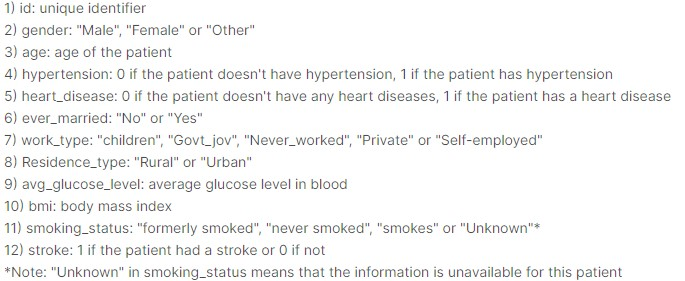

### 1.2 데이터 백업

In [4]:
stroke_data_bak = df.copy()

In [5]:
df.to_csv("C:/Users/ba874/Desktop/OCL/study/dataset/stroke-data-bak.csv", encoding = "cp949", index = False)

#### 1.2.1 백업 데이터 확인

In [6]:
df_bak = pd.read_csv("C:/Users/ba874/Desktop/OCL/study/dataset/stroke-data-bak.csv")

In [7]:
df_bak

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# 2. 데이터 확인

### 2.1 데이터 상태확인 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


1) bmi만 결측치 존재하여 처리가 필요하고 그 외 feature들은 이상치 확인할 예정입니다.

2) hypertension, heart_disease, stroke는 0과 1의 문제가 아닌 int64가 아닌 boolean type으로 변경하는 것이 더 좋을 것으로 생각되어 변경할 예정입니다.

3) stroke는 target feature

지식1 : ML에서는 int형이든 boolean이든 0과 1로 구성된 것은 차이가 없다고 볼 수 있다.

In [195]:
df["stroke"].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

### 2.2 데이터 기술적 통계확인 

In [9]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


age, avg_glucose_level, bmi는 분산이 커보이니 보다 자세한 상태 확인 해 볼 예정입니다.

In [10]:
df["gender"].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

1) 성비는 약 3:2정도로 구성되어 성별에 따른 것이 작용 요인이 확인할 예정입니다. 

2) 성별의 연령대에 따라 많이 발생되는 구간을 확인해볼 예정이다.

In [11]:
df["ever_married"].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

3) 결혼에 관한 데이터가 의미가 있을지를 모르겟다.

In [12]:
df["work_type"].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

4) 근무 유형도 개인에 몰려 있어 상관관계가 있을지 의문이다.

In [13]:
df["Residence_type"].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

5) Urban 혹은 Rural의 비율이 거의 같아 이에 따른 구분도 해볼 예정입니다.

In [14]:
df["smoking_status"].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

6) 흡연 여부를 알 수 없는 데이터가 상당 수 존재하여 모델에 있어 방해요소가 될 수도 있을 것이라 예상중입니다.

### 2.3 데이터 이상치 확인

1) age의 경우 0세에서 82세의 값을 갖으면 이상치는 없다고 판단하나 0.08세 같은 존재할 수 없는 나이가 있으면 안됨으로 data type을 변환해준다.

In [15]:
df["age"] = df["age"].astype('int64')

2) avg_glucose_level에서 55 ~ 271 정도의 수치를 보이고 있으나이고 있으나 [기사](http://www.thenurse.co.kr/news/articleView.html?idxno=57919)와 [당뇨병 기준](https://www.kslm.org/sub01/sub03.html)에 따르면 가능한 수치로 판단되어 그대로 사용하겠다.

# 3. 데이터 클린징

### 3.1 데이터 타입 변환 및 문자열 데이터를 numeric으로 대체

남성은 1로 여성은 0으로 other은 그 중간으로 치환한다

In [16]:
df["gender"] = df["gender"].replace("Female", "0")
df["gender"] = df["gender"].replace("Male", "1")
df["gender"] = df["gender"].replace("Other", "0.5")

In [17]:
df["gender"] = df["gender"].astype('float32')

주로 True가 1을 의미함으로 Yes를 1로 NO를 0으로 치환한다

In [18]:
df["ever_married"] = df["ever_married"].replace("No", "0")
df["ever_married"] = df["ever_married"].replace("Yes", "1")

In [19]:
df["ever_married"] = df["ever_married"].astype('int64')

work_type은 가장 많은 것부터 가장 적은 순서로 0 - 4까지로 치환한다

In [20]:
df["work_type"] = df["work_type"].replace("Private", "0")
df["work_type"] = df["work_type"].replace("Self-employed", "1")
df["work_type"] = df["work_type"].replace("children", "2")
df["work_type"] = df["work_type"].replace("Govt_job", "3")
df["work_type"] = df["work_type"].replace("Never_worked", "4")

In [21]:
df["work_type"] = df["work_type"].astype('int64')

Urban을 1로 Rural을 0으로 치환한다

In [22]:
df["Residence_type"] = df["Residence_type"].replace("Rural", "0")
df["Residence_type"] = df["Residence_type"].replace("Urban", "1")

In [23]:
df["Residence_type"] = df["Residence_type"].astype('int64')

smokes를 3로 formerly smoked를 2으로 Unknown을 1로 never smoked을 0으로 치환한다

In [24]:
df["smoking_status"] = df["smoking_status"].replace("never smoked", "0")
df["smoking_status"] = df["smoking_status"].replace("Unknown", "1")
df["smoking_status"] = df["smoking_status"].replace("formerly smoked", "2")
df["smoking_status"] = df["smoking_status"].replace("smokes", "3")

In [25]:
df["smoking_status"] = df["smoking_status"].astype('int64')

In [26]:
df["gender"] = df["gender"].astype("float32")
df["avg_glucose_level"] = df["avg_glucose_level"].astype("float32")
df["bmi"] = df["bmi"].astype("float32")

### 3.2 결측치 처리

In [27]:
df[df["bmi"].isnull() == True].describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,0.0,201.000000,201.000000
mean,23171.109453,0.517413,52.034826,0.233831,0.164179,0.741294,0.781095,0.527363,126.724579,NaN,1.557214,0.199005
std,20882.483120,0.500944,22.309052,0.424323,0.371363,0.439017,1.068570,0.500497,59.240314,NaN,1.080722,0.400249
min,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,57.520000,NaN,0.000000,0.000000
25%,4062.000000,0.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,81.430000,NaN,1.000000,0.000000
50%,18234.000000,1.000000,58.000000,0.000000,0.000000,1.000000,0.000000,1.000000,99.870003,NaN,1.000000,0.000000
75%,37937.000000,1.000000,71.000000,0.000000,0.000000,1.000000,1.000000,1.000000,191.789993,NaN,3.000000,0.000000
max,72231.000000,1.000000,82.000000,1.000000,1.000000,1.000000,3.000000,1.000000,260.850006,NaN,3.000000,1.000000


아래와 같이 전처리 방식을 다양하게 하여 진행한다

1) age를 0-9, 10-19와 같이 10살 단위로 평균과 표준편차를 구해서 결측치를 대체한다. 단, 이때 평균과 중앙 값이 오차범위 +- 3인데 표준편차가 6이상의 값을 갖는 경우 max값과 min값을 제외하여 평균으로 대체한다.

0 - 9세 결측치 처리

In [28]:
df[(0 <= df["age"]) & (df["age"] < 10)].describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,472.000000,472.000000,472.000000,472.0,472.000000,472.0,472.000000,472.000000,472.000000,459.000000,472.0,472.000000
mean,35604.118644,0.531780,4.152542,0.0,0.002119,0.0,1.993644,0.523305,93.519707,18.869936,1.0,0.002119
std,21058.902929,0.499519,2.900698,0.0,0.046029,0.0,0.102836,0.499987,25.485069,3.548062,0.0,0.046029
min,172.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,55.349998,10.300000,1.0,0.000000
25%,16383.750000,0.000000,1.000000,0.0,0.000000,0.0,2.000000,0.000000,76.217501,16.700001,1.0,0.000000
50%,35095.500000,1.000000,4.000000,0.0,0.000000,0.0,2.000000,1.000000,89.259998,18.299999,1.0,0.000000
75%,53928.750000,1.000000,7.000000,0.0,0.000000,0.0,2.000000,1.000000,107.562498,20.100000,1.0,0.000000
max,72940.000000,1.000000,9.000000,0.0,1.000000,0.0,2.000000,1.000000,206.250000,35.000000,1.0,1.000000


bmi 지수의 평군과 중간값이 유사하며 표준편차도 6미만의 값을 가짐으로 평균으로 대체한다.

In [29]:
df_age = df.copy()

In [30]:
age0 = df_age["bmi"][(0 <= df_age["age"] ) & (df_age["age"] < 10)].mean()

In [31]:
import numpy as np

In [32]:
df_age["bmi"][(0 <= df_age["age"] ) & (df_age["age"] < 10)] = df_age["bmi"][(0 <= df_age["age"] ) & (df_age["age"] < 10)].replace(to_replace = np.nan, value = age0)

<ipython-input-32-b757cadbb638>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age["bmi"][(0 <= df_age["age"] ) & (df_age["age"] < 10)] = df_age["bmi"][(0 <= df_age["age"] ) & (df_age["age"] < 10)].replace(to_replace = np.nan, value = age0)


In [33]:
df_age[(0 <= df_age["age"]) & (df_age["age"] < 10)].describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,472.000000,472.000000,472.000000,472.0,472.000000,472.0,472.000000,472.000000,472.000000,472.000000,472.0,472.000000
mean,35604.118644,0.531780,4.152542,0.0,0.002119,0.0,1.993644,0.523305,93.519707,18.869936,1.0,0.002119
std,21058.902929,0.499519,2.900698,0.0,0.046029,0.0,0.102836,0.499987,25.485069,3.498754,0.0,0.046029
min,172.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,55.349998,10.300000,1.0,0.000000
25%,16383.750000,0.000000,1.000000,0.0,0.000000,0.0,2.000000,0.000000,76.217501,16.799999,1.0,0.000000
50%,35095.500000,1.000000,4.000000,0.0,0.000000,0.0,2.000000,1.000000,89.259998,18.400000,1.0,0.000000
75%,53928.750000,1.000000,7.000000,0.0,0.000000,0.0,2.000000,1.000000,107.562498,20.025000,1.0,0.000000
max,72940.000000,1.000000,9.000000,0.0,1.000000,0.0,2.000000,1.000000,206.250000,35.000000,1.0,1.000000


In [34]:
df_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   float32
 2   age                5110 non-null   int64  
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int64  
 6   work_type          5110 non-null   int64  
 7   Residence_type     5110 non-null   int64  
 8   avg_glucose_level  5110 non-null   float32
 9   bmi                4922 non-null   float32
 10  smoking_status     5110 non-null   int64  
 11  stroke             5110 non-null   int64  
dtypes: float32(3), int64(9)
memory usage: 419.3 KB


10 - 19세 결측치 처리

In [35]:
df_age[(10 <= df["age"]) & (df["age"] < 20)].describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,494.000000,494.000000,494.000000,494.000000,494.0,494.000000,494.000000,494.000000,494.000000,485.000000,494.000000,494.000000
mean,36802.603239,0.475709,14.858300,0.004049,0.0,0.006073,1.141700,0.469636,95.391090,24.906582,0.757085,0.002024
std,21141.230461,0.499915,2.761691,0.063564,0.0,0.077770,1.162358,0.499583,28.023144,7.206297,0.730181,0.044992
min,67.000000,0.000000,10.000000,0.000000,0.0,0.000000,0.000000,0.000000,55.340000,13.700000,0.000000,0.000000
25%,18241.500000,0.000000,13.000000,0.000000,0.0,0.000000,0.000000,0.000000,76.612499,20.600000,0.000000,0.000000
50%,36409.500000,0.000000,15.000000,0.000000,0.0,0.000000,2.000000,0.000000,89.375000,23.400000,1.000000,0.000000
75%,54892.500000,1.000000,17.000000,0.000000,0.0,0.000000,2.000000,1.000000,110.715000,27.600000,1.000000,0.000000
max,72914.000000,1.000000,19.000000,1.000000,0.0,1.000000,4.000000,1.000000,233.710007,97.599998,3.000000,1.000000


결측치가 따로 없음으로 처리하지 않는다

In [36]:
age1_min = df_age["bmi"][(10 <= df_age["age"]) & (df_age["age"] < 20)].min()
age1_max = df_age["bmi"][(10 <= df_age["age"]) & (df_age["age"] < 20)].max()
age1_min_cnt = df_age["bmi"][(10 <= df_age["age"]) & (df_age["age"] < 20) & (df_age["bmi"] == age1_min)].count()
age1_max_cnt = df_age["bmi"][(10 <= df_age["age"]) & (df_age["age"] < 20) & (df_age["bmi"] == age1_max)].count()
df_age10 = df_age["bmi"][(10 <= df_age["age"]) & (df_age["age"] < 20)]
age1 = df_age10.mean() - (age1_min * age1_min_cnt) / df_age10.count() - (age1_max * age1_max_cnt) / df_age10.count()
df_age["bmi"][(10 <= df["age"]) & (df["age"] < 20)] = df_age["bmi"][(10 <= df["age"]) & (df["age"] < 20)].replace(to_replace = np.nan, value = age1)
df_age[(10 <= df["age"]) & (df["age"] < 20)].describe()

<ipython-input-36-4d7e0aedab2b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age["bmi"][(10 <= df["age"]) & (df["age"] < 20)] = df_age["bmi"][(10 <= df["age"]) & (df["age"] < 20)].replace(to_replace = np.nan, value = age1)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,494.000000,494.000000,494.000000,494.000000,494.0,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000
mean,36802.603239,0.475709,14.858300,0.004049,0.0,0.006073,1.141700,0.469636,95.391090,24.902399,0.757085,0.002024
std,21141.230461,0.499915,2.761691,0.063564,0.0,0.077770,1.162358,0.499583,28.023144,7.140284,0.730181,0.044992
min,67.000000,0.000000,10.000000,0.000000,0.0,0.000000,0.000000,0.000000,55.340000,13.700000,0.000000,0.000000
25%,18241.500000,0.000000,13.000000,0.000000,0.0,0.000000,0.000000,0.000000,76.612499,20.725000,0.000000,0.000000
50%,36409.500000,0.000000,15.000000,0.000000,0.0,0.000000,2.000000,0.000000,89.375000,23.500000,1.000000,0.000000
75%,54892.500000,1.000000,17.000000,0.000000,0.0,0.000000,2.000000,1.000000,110.715000,27.575000,1.000000,0.000000
max,72914.000000,1.000000,19.000000,1.000000,0.0,1.000000,4.000000,1.000000,233.710007,97.599998,3.000000,1.000000


20 - 29세 결측치 처리

In [37]:
df_age[(20 <= df_age["age"]) & (df_age["age"] < 30)].describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,539.000000,549.000000,549.0
mean,37462.131148,0.317851,24.520947,0.016393,0.001821,0.304189,0.331512,0.513661,94.368217,28.136913,1.058288,0.0
std,20870.880599,0.465575,2.833909,0.127099,0.042679,0.460483,0.895717,0.500269,29.671982,7.416166,1.182394,0.0
min,129.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.119999,16.600000,0.000000,0.0
25%,20070.000000,0.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,74.239998,23.100000,0.000000,0.0
50%,38397.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,88.510002,26.799999,1.000000,0.0
75%,55262.000000,1.000000,27.000000,0.000000,0.000000,1.000000,0.000000,1.000000,105.260002,31.100000,2.000000,0.0
max,72818.000000,1.000000,29.000000,1.000000,1.000000,1.000000,4.000000,1.000000,256.739990,78.000000,3.000000,0.0


bmi 지수의 평균과 중앙값이 기준에 부합하나 표준편차가 6이상임으로 max값과 min 값을 제외한 평균을 구하여 결측치를 처리하겠다.

In [38]:
age2_min = df_age["bmi"][(20 <= df_age["age"]) & (df_age["age"] < 30)].min()
age2_max = df_age["bmi"][(20 <= df_age["age"]) & (df_age["age"] < 30)].max()
age2_min_cnt = df_age["bmi"][(20 <= df_age["age"]) & (df_age["age"] < 30) & (df_age["bmi"] == age2_min)].count()
age2_max_cnt = df_age["bmi"][(20 <= df_age["age"]) & (df_age["age"] < 30) & (df_age["bmi"] == age2_max)].count()
df_age20 = df_age["bmi"][(20 <= df_age["age"]) & (df_age["age"] < 30)]
age2 = df_age20.mean() - (age2_min * age2_min_cnt) / df_age20.count() - (age2_max * age2_max_cnt) / df_age20.count()
df_age["bmi"][(20 <= df["age"]) & (df["age"] < 30)] = df_age["bmi"][(20 <= df["age"]) & (df["age"] < 30)].replace(to_replace = np.nan, value = age2)
df_age[(20 <= df["age"]) & (df["age"] < 30)].describe()

<ipython-input-38-2bca8a2808d0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age["bmi"][(20 <= df["age"]) & (df["age"] < 30)] = df_age["bmi"][(20 <= df["age"]) & (df["age"] < 30)].replace(to_replace = np.nan, value = age2)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.0
mean,37462.131148,0.317851,24.520947,0.016393,0.001821,0.304189,0.331512,0.513661,94.368217,28.133713,1.058288,0.0
std,20870.880599,0.465575,2.833909,0.127099,0.042679,0.460483,0.895717,0.500269,29.671982,7.348224,1.182394,0.0
min,129.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.119999,16.600000,0.000000,0.0
25%,20070.000000,0.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,74.239998,23.100000,0.000000,0.0
50%,38397.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,88.510002,26.900000,1.000000,0.0
75%,55262.000000,1.000000,27.000000,0.000000,0.000000,1.000000,0.000000,1.000000,105.260002,30.900000,2.000000,0.0
max,72818.000000,1.000000,29.000000,1.000000,1.000000,1.000000,4.000000,1.000000,256.739990,78.000000,3.000000,0.0


In [39]:
df_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   float32
 2   age                5110 non-null   int64  
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int64  
 6   work_type          5110 non-null   int64  
 7   Residence_type     5110 non-null   int64  
 8   avg_glucose_level  5110 non-null   float32
 9   bmi                4941 non-null   float32
 10  smoking_status     5110 non-null   int64  
 11  stroke             5110 non-null   int64  
dtypes: float32(3), int64(9)
memory usage: 419.3 KB


30 - 39세 결측치 처리

In [40]:
df_age[(30 <= df_age["age"]) & (df_age["age"] < 40)].describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000,631.000000,655.000000,655.000000
mean,35834.410687,0.363359,34.569466,0.039695,0.001527,0.764885,0.538931,0.511450,97.573120,31.205849,1.135878,0.009160
std,20701.666901,0.481335,2.924271,0.195390,0.039073,0.424394,1.062826,0.500251,35.738190,7.936419,1.199456,0.095343
min,99.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.270000,15.700000,0.000000,0.000000
25%,19013.000000,0.000000,32.000000,0.000000,0.000000,1.000000,0.000000,0.000000,75.990002,25.400000,0.000000,0.000000
50%,36825.000000,0.000000,34.000000,0.000000,0.000000,1.000000,0.000000,1.000000,88.500000,29.700001,1.000000,0.000000
75%,52844.500000,1.000000,37.000000,0.000000,0.000000,1.000000,0.000000,1.000000,106.290001,35.700001,2.000000,0.000000
max,72525.000000,1.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,254.949997,92.000000,3.000000,1.000000


In [41]:
age3_min = df_age["bmi"][(30 <= df_age["age"]) & (df_age["age"] < 40)].min()
age3_max = df_age["bmi"][(30 <= df_age["age"]) & (df_age["age"] < 40)].max()
age3_min_cnt = df_age["bmi"][(30 <= df_age["age"]) & (df_age["age"] < 40) & (df_age["bmi"] == age3_min)].count()
age3_max_cnt = df_age["bmi"][(30 <= df_age["age"]) & (df_age["age"] < 40) & (df_age["bmi"] == age3_max)].count()
df_age30 = df_age["bmi"][(30 <= df_age["age"]) & (df_age["age"] < 40)]
age3 = df_age30.mean() - (age3_min * age3_min_cnt) / df_age30.count() - (age3_max * age3_max_cnt) / df_age30.count()
df_age["bmi"][(30 <= df_age["age"]) & (df_age["age"] < 40)] = df_age["bmi"][(30 <= df_age["age"]) & (df_age["age"] < 40)].replace(to_replace = np.nan, value = age3)
df_age[(30 <= df_age["age"]) & (df_age["age"] < 40)].describe()

<ipython-input-41-3d0f71e532ff>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age["bmi"][(30 <= df_age["age"]) & (df_age["age"] < 40)] = df_age["bmi"][(30 <= df_age["age"]) & (df_age["age"] < 40)].replace(to_replace = np.nan, value = age3)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000
mean,35834.410687,0.363359,34.569466,0.039695,0.001527,0.764885,0.538931,0.511450,97.573120,31.199598,1.135878,0.009160
std,20701.666901,0.481335,2.924271,0.195390,0.039073,0.424394,1.062826,0.500251,35.738190,7.789505,1.199456,0.095343
min,99.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.270000,15.700000,0.000000,0.000000
25%,19013.000000,0.000000,32.000000,0.000000,0.000000,1.000000,0.000000,0.000000,75.990002,25.500000,0.000000,0.000000
50%,36825.000000,0.000000,34.000000,0.000000,0.000000,1.000000,0.000000,1.000000,88.500000,30.000000,1.000000,0.000000
75%,52844.500000,1.000000,37.000000,0.000000,0.000000,1.000000,0.000000,1.000000,106.290001,35.350000,2.000000,0.000000
max,72525.000000,1.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,254.949997,92.000000,3.000000,1.000000


In [42]:
df_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   float32
 2   age                5110 non-null   int64  
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int64  
 6   work_type          5110 non-null   int64  
 7   Residence_type     5110 non-null   int64  
 8   avg_glucose_level  5110 non-null   float32
 9   bmi                4965 non-null   float32
 10  smoking_status     5110 non-null   int64  
 11  stroke             5110 non-null   int64  
dtypes: float32(3), int64(9)
memory usage: 419.3 KB


40 - 49세 결측치 처리

In [43]:
df_age[(40 <= df_age["age"]) & (df_age["age"] < 50)].describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,705.000000,730.000000,730.000000
mean,36586.902740,0.383562,44.501370,0.067123,0.016438,0.882192,0.715068,0.484932,100.942307,31.446115,1.197260,0.016438
std,21465.585049,0.486587,2.880924,0.250407,0.127241,0.322602,1.161059,0.500116,38.185177,7.799983,1.187264,0.127241
min,91.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.220001,11.500000,0.000000,0.000000
25%,17146.000000,0.000000,42.000000,0.000000,0.000000,1.000000,0.000000,0.000000,76.107502,25.500000,0.000000,0.000000
50%,36382.500000,0.000000,45.000000,0.000000,0.000000,1.000000,0.000000,0.000000,91.045002,30.000000,1.000000,0.000000
75%,55784.000000,1.000000,47.000000,0.000000,0.000000,1.000000,1.000000,1.000000,110.514999,35.599998,2.000000,0.000000
max,72915.000000,1.000000,49.000000,1.000000,1.000000,1.000000,3.000000,1.000000,267.760010,71.900002,3.000000,1.000000


In [44]:
age4_min = df_age["bmi"][(40 <= df_age["age"]) & (df_age["age"] < 50)].min()
age4_max = df_age["bmi"][(40 <= df_age["age"]) & (df_age["age"] < 50)].max()
age4_min_cnt = df_age["bmi"][(40 <= df_age["age"]) & (df_age["age"] < 50) & (df_age["bmi"] == age4_min)].count()
age4_max_cnt = df_age["bmi"][(40 <= df_age["age"]) & (df_age["age"] < 50) & (df_age["bmi"] == age4_max)].count()
df_age40 = df_age["bmi"][(40 <= df_age["age"]) & (df_age["age"] < 50)]
age4 = df_age40.mean() - (age4_min * age4_min_cnt) / df_age40.count() - (age4_max * age4_max_cnt) / df_age40.count()
df_age["bmi"][(40 <= df_age["age"]) & (df_age["age"] < 50)] = df_age["bmi"][(40 <= df_age["age"]) & (df_age["age"] < 50)].replace(to_replace = np.nan, value = age4)
df_age[(40 <= df_age["age"]) & (df_age["age"] < 50)].describe()

<ipython-input-44-5b6eccce8289>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age["bmi"][(40 <= df_age["age"]) & (df_age["age"] < 50)] = df_age["bmi"][(40 <= df_age["age"]) & (df_age["age"] < 50)].replace(to_replace = np.nan, value = age4)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,36586.902740,0.383562,44.501370,0.067123,0.016438,0.882192,0.715068,0.484932,100.942307,31.442064,1.197260,0.016438
std,21465.585049,0.486587,2.880924,0.250407,0.127241,0.322602,1.161059,0.500116,38.185177,7.665105,1.187264,0.127241
min,91.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.220001,11.500000,0.000000,0.000000
25%,17146.000000,0.000000,42.000000,0.000000,0.000000,1.000000,0.000000,0.000000,76.107502,26.000000,0.000000,0.000000
50%,36382.500000,0.000000,45.000000,0.000000,0.000000,1.000000,0.000000,0.000000,91.045002,30.500000,1.000000,0.000000
75%,55784.000000,1.000000,47.000000,0.000000,0.000000,1.000000,1.000000,1.000000,110.514999,35.400002,2.000000,0.000000
max,72915.000000,1.000000,49.000000,1.000000,1.000000,1.000000,3.000000,1.000000,267.760010,71.900002,3.000000,1.000000


In [45]:
df_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   float32
 2   age                5110 non-null   int64  
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int64  
 6   work_type          5110 non-null   int64  
 7   Residence_type     5110 non-null   int64  
 8   avg_glucose_level  5110 non-null   float32
 9   bmi                4990 non-null   float32
 10  smoking_status     5110 non-null   int64  
 11  stroke             5110 non-null   int64  
dtypes: float32(3), int64(9)
memory usage: 419.3 KB


50 - 59세 결측치 처리

In [46]:
df_age[(50 <= df_age["age"]) & (df_age["age"] < 60)].describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,834.000000,834.000000,834.000000,834.000000,834.000000,834.000000,834.000000,834.000000,834.000000,805.000000,834.000000,834.000000
mean,36951.082734,0.434053,54.406475,0.139089,0.056355,0.922062,0.778177,0.526379,112.723610,31.750444,1.231415,0.057554
std,21460.879598,0.495929,2.845186,0.346247,0.230744,0.268234,1.172905,0.499603,50.170372,7.324245,1.164881,0.233038
min,84.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.340000,16.000000,0.000000,0.000000
25%,17873.000000,0.000000,52.000000,0.000000,0.000000,1.000000,0.000000,0.000000,79.210001,27.000000,0.000000,0.000000
50%,38378.500000,0.000000,54.000000,0.000000,0.000000,1.000000,0.000000,1.000000,94.579998,30.500000,1.000000,0.000000
75%,55400.000000,1.000000,57.000000,0.000000,0.000000,1.000000,1.000000,1.000000,122.457502,35.299999,2.000000,0.000000
max,72918.000000,1.000000,59.000000,1.000000,1.000000,1.000000,3.000000,1.000000,253.929993,66.800003,3.000000,1.000000


In [47]:
age5_min = df_age["bmi"][(50 <= df_age["age"]) & (df_age["age"] < 60)].min()
age5_max = df_age["bmi"][(50 <= df_age["age"]) & (df_age["age"] < 60)].max()
age5_min_cnt = df_age["bmi"][(50 <= df_age["age"]) & (df_age["age"] < 60) & (df_age["bmi"] == age5_min)].count()
age5_max_cnt = df_age["bmi"][(50 <= df_age["age"]) & (df_age["age"] < 60) & (df_age["bmi"] == age5_max)].count()
df_age50 = df_age["bmi"][(50 <= df_age["age"]) & (df_age["age"] < 60)]
age5 = df_age50.mean() - (age5_min * age5_min_cnt) / df_age50.count() - (age5_max * age5_max_cnt) / df_age50.count()
df_age["bmi"][(50 <= df_age["age"]) & (df_age["age"] < 60)] = df_age["bmi"][(50 <= df_age["age"]) & (df_age["age"] < 60)].replace(to_replace = np.nan, value = age5)
df_age[(50 <= df_age["age"]) & (df_age["age"] < 60)].describe()

<ipython-input-47-e7c43e903ae0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age["bmi"][(50 <= df_age["age"]) & (df_age["age"] < 60)] = df_age["bmi"][(50 <= df_age["age"]) & (df_age["age"] < 60)].replace(to_replace = np.nan, value = age5)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,834.000000,834.000000,834.000000,834.000000,834.000000,834.000000,834.000000,834.000000,834.000000,834.000000,834.000000,834.000000
mean,36951.082734,0.434053,54.406475,0.139089,0.056355,0.922062,0.778177,0.526379,112.723610,31.746878,1.231415,0.057554
std,21460.879598,0.495929,2.845186,0.346247,0.230744,0.268234,1.172905,0.499603,50.170372,7.195648,1.164881,0.233038
min,84.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.340000,16.000000,0.000000,0.000000
25%,17873.000000,0.000000,52.000000,0.000000,0.000000,1.000000,0.000000,0.000000,79.210001,27.200001,0.000000,0.000000
50%,38378.500000,0.000000,54.000000,0.000000,0.000000,1.000000,0.000000,1.000000,94.579998,30.700001,1.000000,0.000000
75%,55400.000000,1.000000,57.000000,0.000000,0.000000,1.000000,1.000000,1.000000,122.457502,35.099998,2.000000,0.000000
max,72918.000000,1.000000,59.000000,1.000000,1.000000,1.000000,3.000000,1.000000,253.929993,66.800003,3.000000,1.000000


In [48]:
df_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   float32
 2   age                5110 non-null   int64  
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int64  
 6   work_type          5110 non-null   int64  
 7   Residence_type     5110 non-null   int64  
 8   avg_glucose_level  5110 non-null   float32
 9   bmi                5019 non-null   float32
 10  smoking_status     5110 non-null   int64  
 11  stroke             5110 non-null   int64  
dtypes: float32(3), int64(9)
memory usage: 419.3 KB


60 - 69세 결측치 처리

In [49]:
df_age[(60 <= df_age["age"]) & (df_age["age"] < 70)].describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,621.000000,621.000000,621.000000,621.000000,621.000000,621.000000,621.000000,621.000000,621.000000,590.000000,621.000000,621.000000
mean,37120.252818,0.433172,64.078905,0.175523,0.106280,0.935588,0.763285,0.497585,119.287025,31.004072,1.260870,0.075684
std,20715.942523,0.495913,2.853163,0.380721,0.308444,0.245684,1.102931,0.500397,56.491707,6.390093,1.134317,0.264706
min,354.000000,0.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.230000,14.100000,0.000000,0.000000
25%,18752.000000,0.000000,62.000000,0.000000,0.000000,1.000000,0.000000,0.000000,79.580002,26.799999,0.000000,0.000000
50%,37349.000000,0.000000,64.000000,0.000000,0.000000,1.000000,0.000000,0.000000,95.870003,30.100000,1.000000,0.000000
75%,54807.000000,1.000000,66.000000,0.000000,0.000000,1.000000,1.000000,1.000000,151.160004,34.700001,2.000000,0.000000
max,72642.000000,1.000000,69.000000,1.000000,1.000000,1.000000,3.000000,1.000000,271.739990,60.200001,3.000000,1.000000


In [50]:
age6_min = df_age["bmi"][(60 <= df_age["age"]) & (df_age["age"] < 70)].min()
age6_max = df_age["bmi"][(60 <= df_age["age"]) & (df_age["age"] < 70)].max()
age6_min_cnt = df_age["bmi"][(60 <= df_age["age"]) & (df_age["age"] < 70) & (df_age["bmi"] == age6_min)].count()
age6_max_cnt = df_age["bmi"][(60 <= df_age["age"]) & (df_age["age"] < 70) & (df_age["bmi"] == age6_max)].count()
df_age60 = df_age["bmi"][(60 <= df_age["age"]) & (df_age["age"] < 70)]
age6 = df_age60.mean() - (age6_min * age6_min_cnt) / df_age60.count() - (age6_max * age6_max_cnt) / df_age60.count()
df_age["bmi"][(60 <= df_age["age"]) & (df_age["age"] < 70)] = df_age["bmi"][(60 <= df_age["age"]) & (df_age["age"] < 70)].replace(to_replace = np.nan, value = age6)
df_age[(60 <= df_age["age"]) & (df_age["age"] < 70)].describe()

<ipython-input-50-e1a66ebf14c5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age["bmi"][(60 <= df_age["age"]) & (df_age["age"] < 70)] = df_age["bmi"][(60 <= df_age["age"]) & (df_age["age"] < 70)].replace(to_replace = np.nan, value = age6)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,621.000000,621.000000,621.000000,621.000000,621.000000,621.000000,621.000000,621.000000,621.000000,621.000000,621.000000,621.000000
mean,37120.252818,0.433172,64.078905,0.175523,0.106280,0.935588,0.763285,0.497585,119.287025,30.997789,1.260870,0.075684
std,20715.942523,0.495913,2.853163,0.380721,0.308444,0.245684,1.102931,0.500397,56.491707,6.228352,1.134317,0.264706
min,354.000000,0.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.230000,14.100000,0.000000,0.000000
25%,18752.000000,0.000000,62.000000,0.000000,0.000000,1.000000,0.000000,0.000000,79.580002,27.000000,0.000000,0.000000
50%,37349.000000,0.000000,64.000000,0.000000,0.000000,1.000000,0.000000,0.000000,95.870003,30.500000,1.000000,0.000000
75%,54807.000000,1.000000,66.000000,0.000000,0.000000,1.000000,1.000000,1.000000,151.160004,34.500000,2.000000,0.000000
max,72642.000000,1.000000,69.000000,1.000000,1.000000,1.000000,3.000000,1.000000,271.739990,60.200001,3.000000,1.000000


In [51]:
df_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   float32
 2   age                5110 non-null   int64  
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int64  
 6   work_type          5110 non-null   int64  
 7   Residence_type     5110 non-null   int64  
 8   avg_glucose_level  5110 non-null   float32
 9   bmi                5050 non-null   float32
 10  smoking_status     5110 non-null   int64  
 11  stroke             5110 non-null   int64  
dtypes: float32(3), int64(9)
memory usage: 419.3 KB


70 - 79세 결측치 처리

In [52]:
df_age[(70 <= df_age["age"]) & (df_age["age"] < 80)].describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,513.000000,569.000000,569.000000
mean,35075.158172,0.409490,75.077329,0.240773,0.182777,0.922671,0.771529,0.518453,124.662582,29.378164,1.126538,0.165202
std,21524.496982,0.492172,3.032279,0.427929,0.386823,0.267347,0.973504,0.500099,59.223755,5.644164,1.057243,0.371690
min,259.000000,0.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.320000,11.300000,0.000000,0.000000
25%,15282.000000,0.000000,72.000000,0.000000,0.000000,1.000000,0.000000,0.000000,79.300003,25.500000,0.000000,0.000000
50%,34995.000000,0.000000,75.000000,0.000000,0.000000,1.000000,1.000000,1.000000,98.839996,28.799999,1.000000,0.000000
75%,53957.000000,1.000000,78.000000,0.000000,0.000000,1.000000,1.000000,1.000000,190.139999,32.799999,2.000000,0.000000
max,72823.000000,1.000000,79.000000,1.000000,1.000000,1.000000,3.000000,1.000000,267.609985,54.599998,3.000000,1.000000


In [53]:
age7 = df_age["bmi"][(70 <= df_age["age"] ) & (df_age["age"] < 80)].mean()

In [54]:
df_age["bmi"][(70 <= df_age["age"] ) & (df_age["age"] < 80)] = df_age["bmi"][(70 <= df_age["age"] ) & (df_age["age"] < 80)].replace(to_replace = np.nan, value = age7)

<ipython-input-54-3ef3c0ab9d28>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age["bmi"][(70 <= df_age["age"] ) & (df_age["age"] < 80)] = df_age["bmi"][(70 <= df_age["age"] ) & (df_age["age"] < 80)].replace(to_replace = np.nan, value = age7)


In [55]:
df_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   float32
 2   age                5110 non-null   int64  
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int64  
 6   work_type          5110 non-null   int64  
 7   Residence_type     5110 non-null   int64  
 8   avg_glucose_level  5110 non-null   float32
 9   bmi                5106 non-null   float32
 10  smoking_status     5110 non-null   int64  
 11  stroke             5110 non-null   int64  
dtypes: float32(3), int64(9)
memory usage: 419.3 KB


80 - 89세 결측치 처리

In [56]:
df_age[(80 <= df_age["age"]) & (df_age["age"] < 90)].describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,182.000000,186.000000,186.000000
mean,37887.876344,0.392473,80.924731,0.268817,0.236559,0.876344,0.688172,0.553763,122.161224,28.281321,0.994624,0.215054
std,21780.454683,0.489619,0.821818,0.444541,0.426116,0.330077,0.818416,0.498443,60.296276,5.135231,1.052653,0.411969
min,132.000000,0.000000,80.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.750000,16.900000,0.000000,0.000000
25%,19568.000000,0.000000,80.000000,0.000000,0.000000,1.000000,0.000000,0.000000,77.375000,24.924999,0.000000,0.000000
50%,38121.500000,0.000000,81.000000,0.000000,0.000000,1.000000,1.000000,1.000000,96.234997,27.700001,1.000000,0.000000
75%,56591.000000,1.000000,82.000000,1.000000,0.000000,1.000000,1.000000,1.000000,173.074993,31.500000,2.000000,0.000000
max,72819.000000,1.000000,82.000000,1.000000,1.000000,1.000000,3.000000,1.000000,259.630005,47.500000,3.000000,1.000000


In [57]:
age8 = df_age["bmi"][(80 <= df_age["age"] ) & (df_age["age"] < 90)].mean()

In [58]:
df_age["bmi"][(80 <= df_age["age"] ) & (df_age["age"] < 90)] = df_age["bmi"][(80 <= df_age["age"] ) & (df_age["age"] < 90)].replace(to_replace = np.nan, value = age8)

<ipython-input-58-05ddc484b5df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age["bmi"][(80 <= df_age["age"] ) & (df_age["age"] < 90)] = df_age["bmi"][(80 <= df_age["age"] ) & (df_age["age"] < 90)].replace(to_replace = np.nan, value = age8)


In [59]:
df_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   float32
 2   age                5110 non-null   int64  
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int64  
 6   work_type          5110 non-null   int64  
 7   Residence_type     5110 non-null   int64  
 8   avg_glucose_level  5110 non-null   float32
 9   bmi                5110 non-null   float32
 10  smoking_status     5110 non-null   int64  
 11  stroke             5110 non-null   int64  
dtypes: float32(3), int64(9)
memory usage: 419.3 KB


2) gender만 고려한 bmi 결측치 처리

평균과 표준편차를 구해서 결측치를 대체한다. 단, 이때 평균과 중앙 값이 오차범위 +- 3인데 표준편차가 6이상의 값을 갖는 경우 max값과 min값을 제외하여 평균으로 대체한다.

In [60]:
df_gen = df.copy()

In [61]:
df_gen[df_gen["gender"] == "Male"].describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
man_min = df_gen["bmi"][df_gen["gender"] == "Male"].min()
man_max = df_gen["bmi"][df_gen["gender"] == "Male"].max()

In [63]:
man_min_cnt = df_gen["bmi"][(df_gen["gender"] == "Male") & (df_gen["bmi"] == man_min)].count()
man_max_cnt = df_gen["bmi"][(df_gen["gender"] == "Male") & (df_gen["bmi"] == man_max)].count()

In [64]:
df_man = df_gen[df_gen["gender"] == "Male"]

In [65]:
man = df_man.mean() - (man_min * man_min_cnt) / df_man.count() - (man_max * man_max_cnt) / df_man.count()
df_gen[df_gen["gender"] == "Male"] = df_gen[df_gen["gender"] == "Male"].replace(to_replace = np.nan, value = man)
df_gen[df_gen["gender"] == "Male"].describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
df_gen[df_gen["gender"] == "Female"].describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
wom_min = df_gen["bmi"][df_gen["gender"] == 0].min()
wom_max = df_gen["bmi"][df_gen["gender"] == 0].max()
wom_min_cnt = df_gen["bmi"][(df_gen["gender"] == 0) & (df_gen["bmi"] == wom_min)].count()
wom_max_cnt = df_gen["bmi"][(df_gen["gender"] == 0) & (df_gen["bmi"] == wom_max)].count()

In [68]:
df_wom = df_gen[df_gen["gender"] == 0]
wom = df_wom.mean() - (wom_min * wom_min_cnt) / df_wom.count() - (wom_max * wom_max_cnt) / df_wom.count()

In [69]:
df_gen[df_gen["gender"] == 0] = df_gen[df_gen["gender"] == 0].replace(to_replace = np.nan, value = wom)
df_gen[df_gen["gender"] == 0].describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,2994.000000,2994.0,2994.000000,2994.000000,2994.000000,2994.000000,2994.000000,2994.000000,2994.000000,2994.000000,2994.000000,2994.000000
mean,36479.685037,0.0,43.748497,0.092184,0.037742,0.668337,0.800601,0.510688,104.057671,29.064785,1.050768,0.047094
std,21176.443056,0.0,21.983878,0.289334,0.190604,0.470889,1.105216,0.499969,43.590645,7.978275,1.082356,0.211876
min,67.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.119999,10.300000,0.000000,0.000000
25%,17796.500000,0.0,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,76.432501,23.425000,0.000000,0.000000
50%,37093.000000,0.0,44.000000,0.000000,0.000000,1.000000,0.000000,1.000000,90.754997,28.100000,1.000000,0.000000
75%,54310.000000,0.0,61.000000,0.000000,0.000000,1.000000,1.000000,1.000000,112.182503,33.299999,2.000000,0.000000
max,72940.000000,0.0,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,267.760010,78.000000,3.000000,1.000000


In [70]:
df_gen[df_gen["gender"] == 0.5].describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0
mean,56156.0,0.5,26.0,0.0,0.0,0.0,0.0,0.0,143.330002,22.4,2.0,0.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,56156.0,0.5,26.0,0.0,0.0,0.0,0.0,0.0,143.330002,22.4,2.0,0.0
25%,56156.0,0.5,26.0,0.0,0.0,0.0,0.0,0.0,143.330002,22.4,2.0,0.0
50%,56156.0,0.5,26.0,0.0,0.0,0.0,0.0,0.0,143.330002,22.4,2.0,0.0
75%,56156.0,0.5,26.0,0.0,0.0,0.0,0.0,0.0,143.330002,22.4,2.0,0.0
max,56156.0,0.5,26.0,0.0,0.0,0.0,0.0,0.0,143.330002,22.4,2.0,0.0


other을 결측치가 따로 없음으로 처리하지 않는다.

3) age와 gender를 고려한 bmi 결측치 처리

In [71]:
df_AG = df.copy()

0 - 9 여성 bmi 결측치 처리

In [72]:
df_AG[(0 <= df_AG["age"]) & (df_AG["age"] < 10) & (df_AG["gender"] == 0)].describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,221.000000,221.0,221.000000,221.0,221.0,221.0,221.000000,221.000000,221.000000,216.000000,221.0,221.000000
mean,35961.276018,0.0,4.018100,0.0,0.0,0.0,1.990950,0.493213,92.841301,18.687963,1.0,0.004525
std,20938.871917,0.0,2.784639,0.0,0.0,0.0,0.134535,0.501089,26.236326,3.597085,0.0,0.067267
min,533.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,55.349998,10.300000,1.0,0.000000
25%,17238.000000,0.0,1.000000,0.0,0.0,0.0,2.000000,0.000000,74.419998,16.475000,1.0,0.000000
50%,34621.000000,0.0,3.000000,0.0,0.0,0.0,2.000000,0.000000,88.110001,18.000000,1.0,0.000000
75%,53538.000000,0.0,7.000000,0.0,0.0,0.0,2.000000,1.000000,108.230003,20.025000,1.0,0.000000
max,72940.000000,0.0,9.000000,0.0,0.0,0.0,2.000000,1.000000,206.250000,34.000000,1.0,1.000000


In [73]:
AG_0W = df_AG["bmi"][(0 <= df_AG["age"]) & (df_AG["age"] < 10) & (df_AG["gender"] == 0)].mean()

In [74]:
df_AG["bmi"][(0 <= df_AG["age"]) & (df_AG["age"] < 10) & (df_AG["gender"] == 0)] = df_AG["bmi"][(0 <= df_AG["age"] ) & (df_AG["age"] < 10) & (df_AG["gender"] == 0)].replace(to_replace = np.nan, value = AG_0W)

<ipython-input-74-51037ba92a3a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AG["bmi"][(0 <= df_AG["age"]) & (df_AG["age"] < 10) & (df_AG["gender"] == 0)] = df_AG["bmi"][(0 <= df_AG["age"] ) & (df_AG["age"] < 10) & (df_AG["gender"] == 0)].replace(to_replace = np.nan, value = AG_0W)


In [75]:
df_AG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   float32
 2   age                5110 non-null   int64  
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int64  
 6   work_type          5110 non-null   int64  
 7   Residence_type     5110 non-null   int64  
 8   avg_glucose_level  5110 non-null   float32
 9   bmi                4914 non-null   float32
 10  smoking_status     5110 non-null   int64  
 11  stroke             5110 non-null   int64  
dtypes: float32(3), int64(9)
memory usage: 419.3 KB


0- 9 남성 bmi 결측치 처리

In [76]:
df_AG[(0 <= df_AG["age"]) & (df_AG["age"] < 10) & (df_AG["gender"] == 1)].describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,251.000000,251.0,251.000000,251.0,251.000000,251.0,251.000000,251.000000,251.000000,243.000000,251.0,251.0
mean,35289.649402,1.0,4.270916,0.0,0.003984,0.0,1.996016,0.549801,94.117050,19.031687,1.0,0.0
std,21200.834007,0.0,2.999718,0.0,0.063119,0.0,0.063119,0.498508,24.842077,3.503391,0.0,0.0
min,172.000000,1.0,0.000000,0.0,0.000000,0.0,1.000000,0.000000,55.610001,13.000000,1.0,0.0
25%,14558.000000,1.0,1.500000,0.0,0.000000,0.0,2.000000,0.000000,77.980003,17.049999,1.0,0.0
50%,35178.000000,1.0,4.000000,0.0,0.000000,0.0,2.000000,1.000000,89.570000,18.400000,1.0,0.0
75%,54509.000000,1.0,7.000000,0.0,0.000000,0.0,2.000000,1.000000,107.269997,20.100000,1.0,0.0
max,72701.000000,1.0,9.000000,0.0,1.000000,0.0,2.000000,1.000000,194.750000,35.000000,1.0,0.0


In [77]:
AG_0M = df_AG["bmi"][(0 <= df_AG["age"]) & (df_AG["age"] < 10) & (df_AG["gender"] == 1)].mean()
df_AG["bmi"][(0 <= df_AG["age"]) & (df_AG["age"] < 10) & (df_AG["gender"] == 1)] = df_AG["bmi"][(0 <= df_AG["age"] ) & (df_AG["age"] < 10) & (df_AG["gender"] == 1)].replace(to_replace = np.nan, value = AG_0M)

<ipython-input-77-d6af7e22ab09>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AG["bmi"][(0 <= df_AG["age"]) & (df_AG["age"] < 10) & (df_AG["gender"] == 1)] = df_AG["bmi"][(0 <= df_AG["age"] ) & (df_AG["age"] < 10) & (df_AG["gender"] == 1)].replace(to_replace = np.nan, value = AG_0M)


In [78]:
df_AG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   float32
 2   age                5110 non-null   int64  
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int64  
 6   work_type          5110 non-null   int64  
 7   Residence_type     5110 non-null   int64  
 8   avg_glucose_level  5110 non-null   float32
 9   bmi                4922 non-null   float32
 10  smoking_status     5110 non-null   int64  
 11  stroke             5110 non-null   int64  
dtypes: float32(3), int64(9)
memory usage: 419.3 KB


10 - 19 여성 bmi 결측치 처리

In [79]:
df_AG[(10 <= df_AG["age"]) & (df_AG["age"] < 20) & (df_AG["gender"] == 0)].describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,259.000000,259.0,259.000000,259.000000,259.0,259.000000,259.000000,259.000000,259.000000,253.000000,259.000000,259.000000
mean,36745.915058,0.0,15.111969,0.003861,0.0,0.003861,1.061776,0.494208,94.426483,25.202372,0.779923,0.003861
std,21240.163754,0.0,2.710697,0.062137,0.0,0.062137,1.166409,0.500934,27.216452,6.718701,0.783689,0.062137
min,67.000000,0.0,10.000000,0.000000,0.0,0.000000,0.000000,0.000000,55.410000,13.700000,0.000000,0.000000
25%,18961.500000,0.0,13.000000,0.000000,0.0,0.000000,0.000000,0.000000,77.310001,21.200001,0.000000,0.000000
50%,36210.000000,0.0,15.000000,0.000000,0.0,0.000000,0.000000,0.000000,87.980003,23.400000,1.000000,0.000000
75%,54263.000000,0.0,17.000000,0.000000,0.0,0.000000,2.000000,1.000000,106.990002,27.700001,1.000000,0.000000
max,72914.000000,0.0,19.000000,1.000000,0.0,1.000000,4.000000,1.000000,233.710007,55.700001,3.000000,1.000000


In [80]:
AG_1W_min = df_AG["bmi"][(10 <= df_AG["age"]) & (df_AG["age"] < 20) & (df_AG["gender"] == 0)].min()
AG_1W_max = df_AG["bmi"][(10 <= df_AG["age"]) & (df_AG["age"] < 20) & (df_AG["gender"] == 0)].max()
AG_1W_min_cnt = df_AG["bmi"][(10 <= df_AG["age"]) & (df_AG["age"] < 20) & (df_AG["gender"] == 0) & (df_AG["bmi"] == AG_1W_min)].count()
AG_1W_max_cnt = df_AG["bmi"][(10 <= df_AG["age"]) & (df_AG["age"] < 20) & (df_AG["gender"] == 0) & (df_AG["bmi"] == AG_1W_max)].count()
df_AG_1W = df_AG["bmi"][(10 <= df_AG["age"]) & (df_AG["age"] < 20) & (df_AG["gender"] == 0)]
AG_1W = df_AG_1W.mean() - (AG_1W_min * AG_1W_min_cnt) / df_AG_1W.count() - (AG_1W_max * AG_1W_max_cnt) / df_AG_1W.count()
df_AG["bmi"][(10 <= df_AG["age"]) & (df_AG["age"] < 20) & (df_AG["gender"] == 0)] = df_AG["bmi"][(10 <= df_AG["age"]) & (df_AG["age"] < 20) & (df_AG["gender"] == 0)].replace(to_replace = np.nan, value = AG_1W)
df_AG[(10 <= df_AG["age"]) & (df_AG["age"] < 20) & (df_AG["gender"] == 0)].describe()

<ipython-input-80-99d741d99704>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AG["bmi"][(10 <= df_AG["age"]) & (df_AG["age"] < 20) & (df_AG["gender"] == 0)] = df_AG["bmi"][(10 <= df_AG["age"]) & (df_AG["age"] < 20) & (df_AG["gender"] == 0)].replace(to_replace = np.nan, value = AG_1W)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,259.000000,259.0,259.000000,259.000000,259.0,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000
mean,36745.915058,0.0,15.111969,0.003861,0.0,0.003861,1.061776,0.494208,94.426483,25.196020,0.779923,0.003861
std,21240.163754,0.0,2.710697,0.062137,0.0,0.062137,1.166409,0.500934,27.216452,6.640246,0.783689,0.062137
min,67.000000,0.0,10.000000,0.000000,0.0,0.000000,0.000000,0.000000,55.410000,13.700000,0.000000,0.000000
25%,18961.500000,0.0,13.000000,0.000000,0.0,0.000000,0.000000,0.000000,77.310001,21.200001,0.000000,0.000000
50%,36210.000000,0.0,15.000000,0.000000,0.0,0.000000,0.000000,0.000000,87.980003,23.500000,1.000000,0.000000
75%,54263.000000,0.0,17.000000,0.000000,0.0,0.000000,2.000000,1.000000,106.990002,27.650001,1.000000,0.000000
max,72914.000000,0.0,19.000000,1.000000,0.0,1.000000,4.000000,1.000000,233.710007,55.700001,3.000000,1.000000


10 - 19 남성 bmi 결측치 처리

In [81]:
df_AG[(10 <= df_AG["age"]) & (df_AG["age"] < 20) & (df_AG["gender"] == 1)].describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,235.000000,235.0,235.000000,235.000000,235.0,235.000000,235.000000,235.000000,235.000000,232.000000,235.000000,235.0
mean,36865.080851,1.0,14.578723,0.004255,0.0,0.008511,1.229787,0.442553,96.454239,24.584049,0.731915,0.0
std,21076.793470,0.0,2.795978,0.065233,0.0,0.092056,1.153944,0.497749,28.907089,7.704688,0.667021,0.0
min,575.000000,1.0,10.000000,0.000000,0.0,0.000000,0.000000,0.000000,55.340000,14.300000,0.000000,0.0
25%,17654.000000,1.0,12.000000,0.000000,0.0,0.000000,0.000000,0.000000,75.399998,20.299999,0.000000,0.0
50%,36488.000000,1.0,15.000000,0.000000,0.0,0.000000,2.000000,0.000000,92.139999,23.400000,1.000000,0.0
75%,56083.500000,1.0,17.000000,0.000000,0.0,0.000000,2.000000,1.000000,113.244999,27.450001,1.000000,0.0
max,72867.000000,1.0,19.000000,1.000000,0.0,1.000000,4.000000,1.000000,213.869995,97.599998,3.000000,0.0


In [82]:
AG_1M_min = df_AG["bmi"][(10 <= df_AG["age"]) & (df_AG["age"] < 20) & (df_AG["gender"] == 1)].min()
AG_1M_max = df_AG["bmi"][(10 <= df_AG["age"]) & (df_AG["age"] < 20) & (df_AG["gender"] == 1)].max()
AG_1M_min_cnt = df_AG["bmi"][(10 <= df_AG["age"]) & (df_AG["age"] < 20) & (df_AG["gender"] == 1) & (df_AG["bmi"] == AG_1M_min)].count()
AG_1M_max_cnt = df_AG["bmi"][(10 <= df_AG["age"]) & (df_AG["age"] < 20) & (df_AG["gender"] == 1) & (df_AG["bmi"] == AG_1M_max)].count()
df_AG_1M = df_AG["bmi"][(10 <= df_AG["age"]) & (df_AG["age"] < 20) & (df_AG["gender"] == 1)]
AG_1M = df_AG_1M.mean() - (AG_1M_min * AG_1M_min_cnt) / df_AG_1M.count() - (AG_1M_max * AG_1M_max_cnt) / df_AG_1M.count()
df_AG["bmi"][(10 <= df_AG["age"]) & (df_AG["age"] < 20) & (df_AG["gender"] == 1)] = df_AG["bmi"][(10 <= df_AG["age"]) & (df_AG["age"] < 20) & (df_AG["gender"] == 1)].replace(to_replace = np.nan, value = AG_1M)
df_AG[(10 <= df_AG["age"]) & (df_AG["age"] < 20) & (df_AG["gender"] == 1)].describe()

<ipython-input-82-8c6a17270b62>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AG["bmi"][(10 <= df_AG["age"]) & (df_AG["age"] < 20) & (df_AG["gender"] == 1)] = df_AG["bmi"][(10 <= df_AG["age"]) & (df_AG["age"] < 20) & (df_AG["gender"] == 1)].replace(to_replace = np.nan, value = AG_1M)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,235.000000,235.0,235.000000,235.000000,235.0,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.0
mean,36865.080851,1.0,14.578723,0.004255,0.0,0.008511,1.229787,0.442553,96.454239,24.577894,0.731915,0.0
std,21076.793470,0.0,2.795978,0.065233,0.0,0.092056,1.153944,0.497749,28.907089,7.655333,0.667021,0.0
min,575.000000,1.0,10.000000,0.000000,0.0,0.000000,0.000000,0.000000,55.340000,14.300000,0.000000,0.0
25%,17654.000000,1.0,12.000000,0.000000,0.0,0.000000,0.000000,0.000000,75.399998,20.349999,0.000000,0.0
50%,36488.000000,1.0,15.000000,0.000000,0.0,0.000000,2.000000,0.000000,92.139999,23.400000,1.000000,0.0
75%,56083.500000,1.0,17.000000,0.000000,0.0,0.000000,2.000000,1.000000,113.244999,27.400000,1.000000,0.0
max,72867.000000,1.0,19.000000,1.000000,0.0,1.000000,4.000000,1.000000,213.869995,97.599998,3.000000,0.0


20 - 29 여성 bmi 결측치 처리

In [83]:
df_AG[(20 <= df_AG["age"]) & (df_AG["age"] < 30) & (df_AG["gender"] == 0)].describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,374.000000,374.0,374.000000,374.000000,374.000000,374.000000,374.000000,374.00000,374.000000,368.000000,374.000000,374.0
mean,37525.890374,0.0,24.585561,0.016043,0.002674,0.320856,0.299465,0.50000,92.394646,28.110046,0.994652,0.0
std,21095.250075,0.0,2.824995,0.125808,0.051709,0.467431,0.860918,0.50067,27.133194,7.869922,1.162402,0.0
min,129.000000,0.0,20.000000,0.000000,0.000000,0.000000,0.000000,0.00000,55.119999,16.600000,0.000000,0.0
25%,19584.250000,0.0,22.000000,0.000000,0.000000,0.000000,0.000000,0.00000,73.634998,22.600000,0.000000,0.0
50%,38523.000000,0.0,25.000000,0.000000,0.000000,0.000000,0.000000,0.50000,86.960003,26.549999,1.000000,0.0
75%,56071.500000,0.0,27.000000,0.000000,0.000000,1.000000,0.000000,1.00000,104.197500,31.225000,2.000000,0.0
max,72818.000000,0.0,29.000000,1.000000,1.000000,1.000000,3.000000,1.00000,226.750000,78.000000,3.000000,0.0


In [84]:
AG_2W_min = df_AG["bmi"][(20 <= df_AG["age"]) & (df_AG["age"] < 30) & (df_AG["gender"] == 0)].min()
AG_2W_max = df_AG["bmi"][(20 <= df_AG["age"]) & (df_AG["age"] < 30) & (df_AG["gender"] == 0)].max()
AG_2W_min_cnt = df_AG["bmi"][(20 <= df_AG["age"]) & (df_AG["age"] < 30) & (df_AG["gender"] == 0) & (df_AG["bmi"] == AG_2W_min)].count()
AG_2W_max_cnt = df_AG["bmi"][(20 <= df_AG["age"]) & (df_AG["age"] < 30) & (df_AG["gender"] == 0) & (df_AG["bmi"] == AG_2W_max)].count()
df_AG_2W = df_AG["bmi"][(20 <= df_AG["age"]) & (df_AG["age"] < 30) & (df_AG["gender"] == 0)]
AG_2W = df_AG_2W.mean() - (AG_2W_min * AG_2W_min_cnt) / df_AG_2W.count() - (AG_2W_max * AG_2W_max_cnt) / df_AG_2W.count()
df_AG["bmi"][(20 <= df_AG["age"]) & (df_AG["age"] < 30) & (df_AG["gender"] == 0)] = df_AG["bmi"][(20 <= df_AG["age"]) & (df_AG["age"] < 30) & (df_AG["gender"] == 0)].replace(to_replace = np.nan, value = AG_2W)
df_AG[(20 <= df_AG["age"]) & (df_AG["age"] < 30) & (df_AG["gender"] == 0)].describe()

<ipython-input-84-d262b691c3f4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AG["bmi"][(20 <= df_AG["age"]) & (df_AG["age"] < 30) & (df_AG["gender"] == 0)] = df_AG["bmi"][(20 <= df_AG["age"]) & (df_AG["age"] < 30) & (df_AG["gender"] == 0)].replace(to_replace = np.nan, value = AG_2W)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,374.000000,374.0,374.000000,374.000000,374.000000,374.000000,374.000000,374.00000,374.000000,374.000000,374.000000,374.0
mean,37525.890374,0.0,24.585561,0.016043,0.002674,0.320856,0.299465,0.50000,92.394646,28.105921,0.994652,0.0
std,21095.250075,0.0,2.824995,0.125808,0.051709,0.467431,0.860918,0.50067,27.133194,7.806435,1.162402,0.0
min,129.000000,0.0,20.000000,0.000000,0.000000,0.000000,0.000000,0.00000,55.119999,16.600000,0.000000,0.0
25%,19584.250000,0.0,22.000000,0.000000,0.000000,0.000000,0.000000,0.00000,73.634998,22.700001,0.000000,0.0
50%,38523.000000,0.0,25.000000,0.000000,0.000000,0.000000,0.000000,0.50000,86.960003,26.700000,1.000000,0.0
75%,56071.500000,0.0,27.000000,0.000000,0.000000,1.000000,0.000000,1.00000,104.197500,31.100000,2.000000,0.0
max,72818.000000,0.0,29.000000,1.000000,1.000000,1.000000,3.000000,1.00000,226.750000,78.000000,3.000000,0.0


20 - 29 남성 bmi 결측치 처리

In [85]:
df_AG[(20 <= df_AG["age"]) & (df_AG["age"] < 30) & (df_AG["gender"] == 1)].describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,174.000000,174.0,174.000000,174.000000,174.0,174.000000,174.000000,174.000000,174.000000,170.000000,174.000000,174.0
mean,37217.649425,1.0,24.373563,0.017241,0.0,0.270115,0.402299,0.545977,98.328842,28.228817,1.189655,0.0
std,20450.895785,0.0,2.861664,0.130545,0.0,0.445300,0.967205,0.499319,34.109982,6.354764,1.218218,0.0
min,949.000000,1.0,20.000000,0.000000,0.0,0.000000,0.000000,0.000000,55.250000,18.700001,0.000000,0.0
25%,20271.000000,1.0,22.000000,0.000000,0.0,0.000000,0.000000,0.000000,76.327501,24.049999,0.000000,0.0
50%,38134.500000,1.0,24.500000,0.000000,0.0,0.000000,0.000000,1.000000,91.674999,27.049999,1.000000,0.0
75%,52377.250000,1.0,27.000000,0.000000,0.0,1.000000,0.000000,1.000000,110.135002,30.775000,2.000000,0.0
max,72776.000000,1.0,29.000000,1.000000,0.0,1.000000,4.000000,1.000000,256.739990,55.700001,3.000000,0.0


In [86]:
AG_2M_min = df_AG["bmi"][(20 <= df_AG["age"]) & (df_AG["age"] < 30) & (df_AG["gender"] == 1)].min()
AG_2M_max = df_AG["bmi"][(20 <= df_AG["age"]) & (df_AG["age"] < 30) & (df_AG["gender"] == 1)].max()
AG_2M_min_cnt = df_AG["bmi"][(20 <= df_AG["age"]) & (df_AG["age"] < 30) & (df_AG["gender"] == 1) & (df_AG["bmi"] == AG_2M_min)].count()
AG_2M_max_cnt = df_AG["bmi"][(20 <= df_AG["age"]) & (df_AG["age"] < 30) & (df_AG["gender"] == 1) & (df_AG["bmi"] == AG_2M_max)].count()
df_AG_2M = df_AG["bmi"][(20 <= df_AG["age"]) & (df_AG["age"] < 30) & (df_AG["gender"] == 1)]
AG_2M = df_AG_2M.mean() - (AG_2M_min * AG_2M_min_cnt) / df_AG_2M.count() - (AG_2M_max * AG_2M_max_cnt) / df_AG_2M.count()
df_AG["bmi"][(20 <= df_AG["age"]) & (df_AG["age"] < 30) & (df_AG["gender"] == 1)] = df_AG["bmi"][(20 <= df_AG["age"]) & (df_AG["age"] < 30) & (df_AG["gender"] == 1)].replace(to_replace = np.nan, value = AG_2M)
df_AG[(20 <= df_AG["age"]) & (df_AG["age"] < 30) & (df_AG["gender"] == 1)].describe()

<ipython-input-86-3f2befbbdfe9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AG["bmi"][(20 <= df_AG["age"]) & (df_AG["age"] < 30) & (df_AG["gender"] == 1)] = df_AG["bmi"][(20 <= df_AG["age"]) & (df_AG["age"] < 30) & (df_AG["gender"] == 1)].replace(to_replace = np.nan, value = AG_2M)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,174.000000,174.0,174.000000,174.000000,174.0,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.0
mean,37217.649425,1.0,24.373563,0.017241,0.0,0.270115,0.402299,0.545977,98.328842,28.218758,1.189655,0.0
std,20450.895785,0.0,2.861664,0.130545,0.0,0.445300,0.967205,0.499319,34.109982,6.281211,1.218218,0.0
min,949.000000,1.0,20.000000,0.000000,0.0,0.000000,0.000000,0.000000,55.250000,18.700001,0.000000,0.0
25%,20271.000000,1.0,22.000000,0.000000,0.0,0.000000,0.000000,0.000000,76.327501,24.200001,0.000000,0.0
50%,38134.500000,1.0,24.500000,0.000000,0.0,0.000000,0.000000,1.000000,91.674999,27.200001,1.000000,0.0
75%,52377.250000,1.0,27.000000,0.000000,0.0,1.000000,0.000000,1.000000,110.135002,30.600000,2.000000,0.0
max,72776.000000,1.0,29.000000,1.000000,0.0,1.000000,4.000000,1.000000,256.739990,55.700001,3.000000,0.0


30 - 39 여성 bmi 결측치 처리

In [87]:
df_AG[(30 <= df_AG["age"]) & (df_AG["age"] < 40) & (df_AG["gender"] == 0)].describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,417.000000,417.0,417.000000,417.000000,417.0,417.000000,417.000000,417.000000,417.000000,407.000000,417.000000,417.000000
mean,35510.223022,0.0,34.549161,0.031175,0.0,0.767386,0.570743,0.517986,95.620735,31.114248,1.076739,0.014388
std,20514.984493,0.0,2.905251,0.173999,0.0,0.423006,1.074355,0.500277,34.566692,8.257759,1.188430,0.119229
min,99.000000,0.0,30.000000,0.000000,0.0,0.000000,0.000000,0.000000,55.270000,15.700000,0.000000,0.000000
25%,17718.000000,0.0,32.000000,0.000000,0.0,1.000000,0.000000,0.000000,75.269997,24.450001,0.000000,0.000000
50%,37154.000000,0.0,35.000000,0.000000,0.0,1.000000,0.000000,1.000000,87.209999,28.900000,1.000000,0.000000
75%,51746.000000,0.0,37.000000,0.000000,0.0,1.000000,1.000000,1.000000,103.580002,36.349998,2.000000,0.000000
max,72525.000000,0.0,39.000000,1.000000,0.0,1.000000,3.000000,1.000000,254.949997,57.900002,3.000000,1.000000


In [88]:
AG_3W_min = df_AG["bmi"][(30 <= df_AG["age"]) & (df_AG["age"] < 40) & (df_AG["gender"] == 0)].min()
AG_3W_max = df_AG["bmi"][(30 <= df_AG["age"]) & (df_AG["age"] < 40) & (df_AG["gender"] == 0)].max()
AG_3W_min_cnt = df_AG["bmi"][(30 <= df_AG["age"]) & (df_AG["age"] < 40) & (df_AG["gender"] == 0) & (df_AG["bmi"] == AG_3W_min)].count()
AG_3W_max_cnt = df_AG["bmi"][(30 <= df_AG["age"]) & (df_AG["age"] < 40) & (df_AG["gender"] == 0) & (df_AG["bmi"] == AG_3W_max)].count()
df_AG_3W = df_AG["bmi"][(30 <= df_AG["age"]) & (df_AG["age"] < 40) & (df_AG["gender"] == 0)]
AG_3W = df_AG_3W.mean() - (AG_3W_min * AG_3W_min_cnt) / df_AG_3W.count() - (AG_3W_max * AG_3W_max_cnt) / df_AG_3W.count()
df_AG["bmi"][(30 <= df_AG["age"]) & (df_AG["age"] < 40) & (df_AG["gender"] == 0)] = df_AG["bmi"][(30 <= df_AG["age"]) & (df_AG["age"] < 40) & (df_AG["gender"] == 0)].replace(to_replace = np.nan, value = AG_3W)
df_AG[(30 <= df_AG["age"]) & (df_AG["age"] < 40) & (df_AG["gender"] == 0)].describe()

<ipython-input-88-ef1f2554903f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AG["bmi"][(30 <= df_AG["age"]) & (df_AG["age"] < 40) & (df_AG["gender"] == 0)] = df_AG["bmi"][(30 <= df_AG["age"]) & (df_AG["age"] < 40) & (df_AG["gender"] == 0)].replace(to_replace = np.nan, value = AG_3W)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,417.000000,417.0,417.000000,417.000000,417.0,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000
mean,35510.223022,0.0,34.549161,0.031175,0.0,0.767386,0.570743,0.517986,95.620735,31.109911,1.076739,0.014388
std,20514.984493,0.0,2.905251,0.173999,0.0,0.423006,1.074355,0.500277,34.566692,8.157951,1.188430,0.119229
min,99.000000,0.0,30.000000,0.000000,0.0,0.000000,0.000000,0.000000,55.270000,15.700000,0.000000,0.000000
25%,17718.000000,0.0,32.000000,0.000000,0.0,1.000000,0.000000,0.000000,75.269997,24.600000,0.000000,0.000000
50%,37154.000000,0.0,35.000000,0.000000,0.0,1.000000,0.000000,1.000000,87.209999,29.100000,1.000000,0.000000
75%,51746.000000,0.0,37.000000,0.000000,0.0,1.000000,1.000000,1.000000,103.580002,36.000000,2.000000,0.000000
max,72525.000000,0.0,39.000000,1.000000,0.0,1.000000,3.000000,1.000000,254.949997,57.900002,3.000000,1.000000


30 - 39 남성 bmi 결측치 처리

In [89]:
df_AG[(30 <= df_AG["age"]) & (df_AG["age"] < 40) & (df_AG["gender"] == 1)].describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,238.000000,238.0,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,224.000000,238.000000,238.0
mean,36402.420168,1.0,34.605042,0.054622,0.004202,0.760504,0.483193,0.500000,100.993744,31.372320,1.239496,0.0
std,21056.214939,0.0,2.963116,0.227720,0.064820,0.427675,1.042216,0.501054,37.532925,7.331567,1.214103,0.0
min,247.000000,1.0,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.720001,18.299999,0.000000,0.0
25%,20787.250000,1.0,32.000000,0.000000,0.000000,1.000000,0.000000,0.000000,77.942501,26.650002,0.000000,0.0
50%,35656.500000,1.0,34.000000,0.000000,0.000000,1.000000,0.000000,0.500000,90.864998,30.750000,1.000000,0.0
75%,54784.750000,1.0,37.000000,0.000000,0.000000,1.000000,0.000000,1.000000,108.665001,34.224998,2.000000,0.0
max,72276.000000,1.0,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,237.740005,92.000000,3.000000,0.0


In [90]:
AG_3M_min = df_AG["bmi"][(30 <= df_AG["age"]) & (df_AG["age"] < 40) & (df_AG["gender"] == 1)].min()
AG_3M_max = df_AG["bmi"][(30 <= df_AG["age"]) & (df_AG["age"] < 40) & (df_AG["gender"] == 1)].max()
AG_3M_min_cnt = df_AG["bmi"][(30 <= df_AG["age"]) & (df_AG["age"] < 40) & (df_AG["gender"] == 1) & (df_AG["bmi"] == AG_3M_min)].count()
AG_3M_max_cnt = df_AG["bmi"][(30 <= df_AG["age"]) & (df_AG["age"] < 40) & (df_AG["gender"] == 1) & (df_AG["bmi"] == AG_3M_max)].count()
df_AG_3M = df_AG["bmi"][(30 <= df_AG["age"]) & (df_AG["age"] < 40) & (df_AG["gender"] == 1)]
AG_3M = df_AG_3M.mean() - (AG_3M_min * AG_3M_min_cnt) / df_AG_3M.count() - (AG_3M_max * AG_3M_max_cnt) / df_AG_3M.count()
df_AG["bmi"][(30 <= df_AG["age"]) & (df_AG["age"] < 40) & (df_AG["gender"] == 1)] = df_AG["bmi"][(30 <= df_AG["age"]) & (df_AG["age"] < 40) & (df_AG["gender"] == 1)].replace(to_replace = np.nan, value = AG_3M)
df_AG[(30 <= df_AG["age"]) & (df_AG["age"] < 40) & (df_AG["gender"] == 1)].describe()

<ipython-input-90-67aaf4ccfccc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AG["bmi"][(30 <= df_AG["age"]) & (df_AG["age"] < 40) & (df_AG["gender"] == 1)] = df_AG["bmi"][(30 <= df_AG["age"]) & (df_AG["age"] < 40) & (df_AG["gender"] == 1)].replace(to_replace = np.nan, value = AG_3M)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,238.000000,238.0,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.0
mean,36402.420168,1.0,34.605042,0.054622,0.004202,0.760504,0.483193,0.500000,100.993744,31.343353,1.239496,0.0
std,21056.214939,0.0,2.963116,0.227720,0.064820,0.427675,1.042216,0.501054,37.532925,7.112674,1.214103,0.0
min,247.000000,1.0,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.720001,18.299999,0.000000,0.0
25%,20787.250000,1.0,32.000000,0.000000,0.000000,1.000000,0.000000,0.000000,77.942501,26.700001,0.000000,0.0
50%,35656.500000,1.0,34.000000,0.000000,0.000000,1.000000,0.000000,0.500000,90.864998,30.879910,1.000000,0.0
75%,54784.750000,1.0,37.000000,0.000000,0.000000,1.000000,0.000000,1.000000,108.665001,33.775000,2.000000,0.0
max,72276.000000,1.0,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,237.740005,92.000000,3.000000,0.0


40 - 49 여성 bmi 결측치 처리

In [91]:
df_AG[(40 <= df_AG["age"]) & (df_AG["age"] < 50) & (df_AG["gender"] == 0)].describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,450.000000,450.0,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,438.000000,450.000000,450.000000
mean,36881.277778,0.0,44.384444,0.040000,0.011111,0.877778,0.735556,0.482222,101.470345,31.147261,1.180000,0.013333
std,21611.483617,0.0,2.877797,0.196177,0.104939,0.327907,1.182210,0.500240,37.846119,8.103927,1.205426,0.114825
min,91.000000,0.0,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.669998,17.299999,0.000000,0.000000
25%,18423.000000,0.0,42.000000,0.000000,0.000000,1.000000,0.000000,0.000000,76.310001,24.824999,0.000000,0.000000
50%,36307.500000,0.0,44.000000,0.000000,0.000000,1.000000,0.000000,0.000000,92.204998,29.400000,1.000000,0.000000
75%,56806.250000,0.0,47.000000,0.000000,0.000000,1.000000,1.000000,1.000000,111.670000,36.200001,2.000000,0.000000
max,72915.000000,0.0,49.000000,1.000000,1.000000,1.000000,3.000000,1.000000,267.760010,57.200001,3.000000,1.000000


In [92]:
AG_4W_min = df_AG["bmi"][(40 <= df_AG["age"]) & (df_AG["age"] < 50) & (df_AG["gender"] == 0)].min()
AG_4W_max = df_AG["bmi"][(40 <= df_AG["age"]) & (df_AG["age"] < 50) & (df_AG["gender"] == 0)].max()
AG_4W_min_cnt = df_AG["bmi"][(40 <= df_AG["age"]) & (df_AG["age"] < 50) & (df_AG["gender"] == 0) & (df_AG["bmi"] == AG_4W_min)].count()
AG_4W_max_cnt = df_AG["bmi"][(40 <= df_AG["age"]) & (df_AG["age"] < 50) & (df_AG["gender"] == 0) & (df_AG["bmi"] == AG_4W_max)].count()
df_AG_4W = df_AG["bmi"][(40 <= df_AG["age"]) & (df_AG["age"] < 50) & (df_AG["gender"] == 0)]
AG_4W = df_AG_4W.mean() - (AG_4W_min * AG_4W_min_cnt) / df_AG_4W.count() - (AG_4W_max * AG_4W_max_cnt) / df_AG_4W.count()
df_AG["bmi"][(40 <= df_AG["age"]) & (df_AG["age"] < 50) & (df_AG["gender"] == 0)] = df_AG["bmi"][(40 <= df_AG["age"]) & (df_AG["age"] < 50) & (df_AG["gender"] == 0)].replace(to_replace = np.nan, value = AG_4W)
df_AG[(40 <= df_AG["age"]) & (df_AG["age"] < 50) & (df_AG["gender"] == 0)].describe()

<ipython-input-92-6bd43147255e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AG["bmi"][(40 <= df_AG["age"]) & (df_AG["age"] < 50) & (df_AG["gender"] == 0)] = df_AG["bmi"][(40 <= df_AG["age"]) & (df_AG["age"] < 50) & (df_AG["gender"] == 0)].replace(to_replace = np.nan, value = AG_4W)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,450.000000,450.0,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,36881.277778,0.0,44.384444,0.040000,0.011111,0.877778,0.735556,0.482222,101.470345,31.139244,1.180000,0.013333
std,21611.483617,0.0,2.877797,0.196177,0.104939,0.327907,1.182210,0.500240,37.846119,7.995050,1.205426,0.114825
min,91.000000,0.0,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.669998,17.299999,0.000000,0.000000
25%,18423.000000,0.0,42.000000,0.000000,0.000000,1.000000,0.000000,0.000000,76.310001,25.000000,0.000000,0.000000
50%,36307.500000,0.0,44.000000,0.000000,0.000000,1.000000,0.000000,0.000000,92.204998,29.700001,1.000000,0.000000
75%,56806.250000,0.0,47.000000,0.000000,0.000000,1.000000,1.000000,1.000000,111.670000,35.850001,2.000000,0.000000
max,72915.000000,0.0,49.000000,1.000000,1.000000,1.000000,3.000000,1.000000,267.760010,57.200001,3.000000,1.000000


40 - 49 남성 bmi 결측치 처리

In [93]:
df_AG[(40 <= df_AG["age"]) & (df_AG["age"] < 50) & (df_AG["gender"] == 0)].describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,450.000000,450.0,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,36881.277778,0.0,44.384444,0.040000,0.011111,0.877778,0.735556,0.482222,101.470345,31.139244,1.180000,0.013333
std,21611.483617,0.0,2.877797,0.196177,0.104939,0.327907,1.182210,0.500240,37.846119,7.995050,1.205426,0.114825
min,91.000000,0.0,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.669998,17.299999,0.000000,0.000000
25%,18423.000000,0.0,42.000000,0.000000,0.000000,1.000000,0.000000,0.000000,76.310001,25.000000,0.000000,0.000000
50%,36307.500000,0.0,44.000000,0.000000,0.000000,1.000000,0.000000,0.000000,92.204998,29.700001,1.000000,0.000000
75%,56806.250000,0.0,47.000000,0.000000,0.000000,1.000000,1.000000,1.000000,111.670000,35.850001,2.000000,0.000000
max,72915.000000,0.0,49.000000,1.000000,1.000000,1.000000,3.000000,1.000000,267.760010,57.200001,3.000000,1.000000


In [94]:
AG_4M_min = df_AG["bmi"][(40 <= df_AG["age"]) & (df_AG["age"] < 50) & (df_AG["gender"] == 0)].min()
AG_4M_max = df_AG["bmi"][(40 <= df_AG["age"]) & (df_AG["age"] < 50) & (df_AG["gender"] == 0)].max()
AG_4M_min_cnt = df_AG["bmi"][(40 <= df_AG["age"]) & (df_AG["age"] < 50) & (df_AG["gender"] == 0) & (df_AG["bmi"] == AG_4M_min)].count()
AG_4M_max_cnt = df_AG["bmi"][(40 <= df_AG["age"]) & (df_AG["age"] < 50) & (df_AG["gender"] == 0) & (df_AG["bmi"] == AG_4M_max)].count()
df_AG_4M = df_AG["bmi"][(10 <= df_AG["age"]) & (df_AG["age"] < 20) & (df_AG["gender"] == 0)]
AG_4M = df_AG_4M.mean() - (AG_4M_min * AG_4M_min_cnt) / df_AG_4M.count() - (AG_4M_max * AG_4M_max_cnt) / df_AG_4M.count()
df_AG["bmi"][(10 <= df_AG["age"]) & (df_AG["age"] < 20) & (df_AG["gender"] == 0)] = df_AG["bmi"][(40 <= df_AG["age"]) & (df_AG["age"] < 50) & (df_AG["gender"] == 0)].replace(to_replace = np.nan, value = AG_4M)
df_AG[(40 <= df_AG["age"]) & (df_AG["age"] < 50) & (df_AG["gender"] == 0)].describe()

<ipython-input-94-bafc1ad7650a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AG["bmi"][(10 <= df_AG["age"]) & (df_AG["age"] < 20) & (df_AG["gender"] == 0)] = df_AG["bmi"][(40 <= df_AG["age"]) & (df_AG["age"] < 50) & (df_AG["gender"] == 0)].replace(to_replace = np.nan, value = AG_4M)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,450.000000,450.0,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,36881.277778,0.0,44.384444,0.040000,0.011111,0.877778,0.735556,0.482222,101.470345,31.139244,1.180000,0.013333
std,21611.483617,0.0,2.877797,0.196177,0.104939,0.327907,1.182210,0.500240,37.846119,7.995050,1.205426,0.114825
min,91.000000,0.0,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.669998,17.299999,0.000000,0.000000
25%,18423.000000,0.0,42.000000,0.000000,0.000000,1.000000,0.000000,0.000000,76.310001,25.000000,0.000000,0.000000
50%,36307.500000,0.0,44.000000,0.000000,0.000000,1.000000,0.000000,0.000000,92.204998,29.700001,1.000000,0.000000
75%,56806.250000,0.0,47.000000,0.000000,0.000000,1.000000,1.000000,1.000000,111.670000,35.850001,2.000000,0.000000
max,72915.000000,0.0,49.000000,1.000000,1.000000,1.000000,3.000000,1.000000,267.760010,57.200001,3.000000,1.000000


50 - 59 여성 bmi 결측치 처리

In [95]:
df_AG[(50 <= df_AG["age"]) & (df_AG["age"] < 60) & (df_AG["gender"] == 0)].describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,472.000000,472.0,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,463.000000,472.000000,472.000000
mean,37008.463983,0.0,54.186441,0.139831,0.036017,0.927966,0.756356,0.542373,110.383163,31.647947,1.122881,0.055085
std,21839.109971,0.0,2.864081,0.347179,0.186530,0.258818,1.142669,0.498730,48.402214,8.083458,1.149977,0.228388
min,364.000000,0.0,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.340000,16.000000,0.000000,0.000000
25%,17330.750000,0.0,52.000000,0.000000,0.000000,1.000000,0.000000,0.000000,77.865000,26.200001,0.000000,0.000000
50%,38778.500000,0.0,54.000000,0.000000,0.000000,1.000000,0.000000,1.000000,94.465000,30.100000,1.000000,0.000000
75%,55850.000000,0.0,57.000000,0.000000,0.000000,1.000000,1.000000,1.000000,117.312500,35.200001,2.000000,0.000000
max,72918.000000,0.0,59.000000,1.000000,1.000000,1.000000,3.000000,1.000000,244.300003,66.800003,3.000000,1.000000


In [96]:
AG_5W_min = df_AG["bmi"][(50 <= df_AG["age"]) & (df_AG["age"] < 60) & (df_AG["gender"] == 0)].min()
AG_5W_max = df_AG["bmi"][(50 <= df_AG["age"]) & (df_AG["age"] < 60) & (df_AG["gender"] == 0)].max()
AG_5W_min_cnt = df_AG["bmi"][(50 <= df_AG["age"]) & (df_AG["age"] < 60) & (df_AG["gender"] == 0) & (df_AG["bmi"] == AG_5W_min)].count()
AG_5W_max_cnt = df_AG["bmi"][(50 <= df_AG["age"]) & (df_AG["age"] < 60) & (df_AG["gender"] == 0) & (df_AG["bmi"] == AG_5W_max)].count()
df_AG_5W = df_AG["bmi"][(50 <= df_AG["age"]) & (df_AG["age"] < 60) & (df_AG["gender"] == 0)]
AG_5W = df_AG_5W.mean() - (AG_5W_min * AG_5W_min_cnt) / df_AG_5W.count() - (AG_5W_max * AG_5W_max_cnt) / df_AG_5W.count()
df_AG["bmi"][(50 <= df_AG["age"]) & (df_AG["age"] < 60) & (df_AG["gender"] == 0)] = df_AG["bmi"][(50 <= df_AG["age"]) & (df_AG["age"] < 60) & (df_AG["gender"] == 0)].replace(to_replace = np.nan, value = AG_5W)
df_AG[(50 <= df_AG["age"]) & (df_AG["age"] < 60) & (df_AG["gender"] == 0)].describe()

<ipython-input-96-be0a1bf374f8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AG["bmi"][(50 <= df_AG["age"]) & (df_AG["age"] < 60) & (df_AG["gender"] == 0)] = df_AG["bmi"][(50 <= df_AG["age"]) & (df_AG["age"] < 60) & (df_AG["gender"] == 0)].replace(to_replace = np.nan, value = AG_5W)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,472.000000,472.0,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000
mean,37008.463983,0.0,54.186441,0.139831,0.036017,0.927966,0.756356,0.542373,110.383163,31.644531,1.122881,0.055085
std,21839.109971,0.0,2.864081,0.347179,0.186530,0.258818,1.142669,0.498730,48.402214,8.005895,1.149977,0.228388
min,364.000000,0.0,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.340000,16.000000,0.000000,0.000000
25%,17330.750000,0.0,52.000000,0.000000,0.000000,1.000000,0.000000,0.000000,77.865000,26.400000,0.000000,0.000000
50%,38778.500000,0.0,54.000000,0.000000,0.000000,1.000000,0.000000,1.000000,94.465000,30.100000,1.000000,0.000000
75%,55850.000000,0.0,57.000000,0.000000,0.000000,1.000000,1.000000,1.000000,117.312500,35.099998,2.000000,0.000000
max,72918.000000,0.0,59.000000,1.000000,1.000000,1.000000,3.000000,1.000000,244.300003,66.800003,3.000000,1.000000


50 - 59 남성 bmi 결측치 처리

In [97]:
df_AG[(50 <= df_AG["age"]) & (df_AG["age"] < 60) & (df_AG["gender"] == 1)].describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,362.000000,362.0,362.000000,362.000000,362.000000,362.000000,362.00000,362.000000,362.000000,342.000000,362.000000,362.000000
mean,36876.265193,1.0,54.693370,0.138122,0.082873,0.914365,0.80663,0.505525,115.775330,31.889179,1.372928,0.060773
std,20987.318656,0.0,2.798379,0.345505,0.276072,0.280212,1.21220,0.500661,52.296650,6.157901,1.170570,0.239245
min,84.000000,1.0,50.000000,0.000000,0.000000,0.000000,0.00000,0.000000,55.779999,18.100000,0.000000,0.000000
25%,18312.000000,1.0,52.000000,0.000000,0.000000,1.000000,0.00000,0.000000,80.742500,27.700001,0.000000,0.000000
50%,37772.500000,1.0,55.000000,0.000000,0.000000,1.000000,0.00000,1.000000,94.709999,30.799999,1.000000,0.000000
75%,54299.750000,1.0,57.000000,0.000000,0.000000,1.000000,1.00000,1.000000,125.525002,35.400002,2.000000,0.000000
max,72491.000000,1.0,59.000000,1.000000,1.000000,1.000000,3.00000,1.000000,253.929993,64.800003,3.000000,1.000000


In [98]:
AG_5M_min = df_AG["bmi"][(50 <= df_AG["age"]) & (df_AG["age"] < 60) & (df_AG["gender"] == 1)].min()
AG_5M_max = df_AG["bmi"][(50 <= df_AG["age"]) & (df_AG["age"] < 60) & (df_AG["gender"] == 1)].max()
AG_5M_min_cnt = df_AG["bmi"][(50 <= df_AG["age"]) & (df_AG["age"] < 60) & (df_AG["gender"] == 1) & (df_AG["bmi"] == AG_5M_min)].count()
AG_5M_max_cnt = df_AG["bmi"][(50 <= df_AG["age"]) & (df_AG["age"] < 60) & (df_AG["gender"] == 1) & (df_AG["bmi"] == AG_5M_max)].count()
df_AG_5M = df_AG["bmi"][(50 <= df_AG["age"]) & (df_AG["age"] < 60) & (df_AG["gender"] == 1)]
AG_5M = df_AG_5M.mean() - (AG_5M_min * AG_5M_min_cnt) / df_AG_5M.count() - (AG_5M_max * AG_5M_max_cnt) / df_AG_5M.count()
df_AG["bmi"][(50 <= df_AG["age"]) & (df_AG["age"] < 60) & (df_AG["gender"] == 1)] = df_AG["bmi"][(50 <= df_AG["age"]) & (df_AG["age"] < 60) & (df_AG["gender"] == 1)].replace(to_replace = np.nan, value = AG_5M)
df_AG[(50 <= df_AG["age"]) & (df_AG["age"] < 60) & (df_AG["gender"] == 1)].describe()

<ipython-input-98-a104e21141e3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AG["bmi"][(50 <= df_AG["age"]) & (df_AG["age"] < 60) & (df_AG["gender"] == 1)] = df_AG["bmi"][(50 <= df_AG["age"]) & (df_AG["age"] < 60) & (df_AG["gender"] == 1)].replace(to_replace = np.nan, value = AG_5M)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,362.000000,362.0,362.000000,362.000000,362.000000,362.000000,362.00000,362.000000,362.000000,362.000000,362.000000,362.000000
mean,36876.265193,1.0,54.693370,0.138122,0.082873,0.914365,0.80663,0.505525,115.775330,31.875790,1.372928,0.060773
std,20987.318656,0.0,2.798379,0.345505,0.276072,0.280212,1.21220,0.500661,52.296650,5.985148,1.170570,0.239245
min,84.000000,1.0,50.000000,0.000000,0.000000,0.000000,0.00000,0.000000,55.779999,18.100000,0.000000,0.000000
25%,18312.000000,1.0,52.000000,0.000000,0.000000,1.000000,0.00000,0.000000,80.742500,27.900000,0.000000,0.000000
50%,37772.500000,1.0,55.000000,0.000000,0.000000,1.000000,0.00000,1.000000,94.709999,31.100000,1.000000,0.000000
75%,54299.750000,1.0,57.000000,0.000000,0.000000,1.000000,1.00000,1.000000,125.525002,35.099998,2.000000,0.000000
max,72491.000000,1.0,59.000000,1.000000,1.000000,1.000000,3.00000,1.000000,253.929993,64.800003,3.000000,1.000000


60 - 69 여성 bmi 결측치 처리

In [99]:
df_AG[(60 <= df_AG["age"]) & (df_AG["age"] < 70) & (df_AG["gender"] == 0)].describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,352.000000,352.0,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,336.000000,352.000000,352.000000
mean,36295.502841,0.0,64.170455,0.170455,0.068182,0.923295,0.832386,0.505682,115.238983,30.777981,1.187500,0.062500
std,20725.383921,0.0,2.893047,0.376567,0.252416,0.266501,1.133674,0.500679,54.207859,7.022321,1.154238,0.242406
min,354.000000,0.0,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.570000,14.100000,0.000000,0.000000
25%,17213.250000,0.0,62.000000,0.000000,0.000000,1.000000,0.000000,0.000000,79.532501,26.100000,0.000000,0.000000
50%,37437.500000,0.0,64.000000,0.000000,0.000000,1.000000,0.000000,1.000000,93.980000,29.700001,1.000000,0.000000
75%,53049.500000,0.0,66.250000,0.000000,0.000000,1.000000,1.000000,1.000000,126.277500,35.049999,2.000000,0.000000
max,72215.000000,0.0,69.000000,1.000000,1.000000,1.000000,3.000000,1.000000,266.589996,60.200001,3.000000,1.000000


In [100]:
AG_6W_min = df_AG["bmi"][(60 <= df_AG["age"]) & (df_AG["age"] < 70) & (df_AG["gender"] == 0)].min()
AG_6W_max = df_AG["bmi"][(60 <= df_AG["age"]) & (df_AG["age"] < 70) & (df_AG["gender"] == 0)].max()
AG_6W_min_cnt = df_AG["bmi"][(60 <= df_AG["age"]) & (df_AG["age"] < 70) & (df_AG["gender"] == 0) & (df_AG["bmi"] == AG_6W_min)].count()
AG_6W_max_cnt = df_AG["bmi"][(60 <= df_AG["age"]) & (df_AG["age"] < 70) & (df_AG["gender"] == 0) & (df_AG["bmi"] == AG_6W_max)].count()
df_AG_6W = df_AG["bmi"][(60 <= df_AG["age"]) & (df_AG["age"] < 70) & (df_AG["gender"] == 0)]
AG_6W = df_AG_6W.mean() - (AG_6W_min * AG_6W_min_cnt) / df_AG_6W.count() - (AG_6W_max * AG_6W_max_cnt) / df_AG_6W.count()
df_AG["bmi"][(60 <= df_AG["age"]) & (df_AG["age"] < 70) & (df_AG["gender"] == 0)] = df_AG["bmi"][(60 <= df_AG["age"]) & (df_AG["age"] < 70) & (df_AG["gender"] == 0)].replace(to_replace = np.nan, value = AG_6W)
df_AG[(60 <= df_AG["age"]) & (df_AG["age"] < 70) & (df_AG["gender"] == 0)].describe()

<ipython-input-100-8e8af18c8e39>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AG["bmi"][(60 <= df_AG["age"]) & (df_AG["age"] < 70) & (df_AG["gender"] == 0)] = df_AG["bmi"][(60 <= df_AG["age"]) & (df_AG["age"] < 70) & (df_AG["gender"] == 0)].replace(to_replace = np.nan, value = AG_6W)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,352.000000,352.0,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000
mean,36295.502841,0.0,64.170455,0.170455,0.068182,0.923295,0.832386,0.505682,115.238983,30.767925,1.187500,0.062500
std,20725.383921,0.0,2.893047,0.376567,0.252416,0.266501,1.133674,0.500679,54.207859,6.860558,1.154238,0.242406
min,354.000000,0.0,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.570000,14.100000,0.000000,0.000000
25%,17213.250000,0.0,62.000000,0.000000,0.000000,1.000000,0.000000,0.000000,79.532501,26.275000,0.000000,0.000000
50%,37437.500000,0.0,64.000000,0.000000,0.000000,1.000000,0.000000,1.000000,93.980000,29.950000,1.000000,0.000000
75%,53049.500000,0.0,66.250000,0.000000,0.000000,1.000000,1.000000,1.000000,126.277500,34.725000,2.000000,0.000000
max,72215.000000,0.0,69.000000,1.000000,1.000000,1.000000,3.000000,1.000000,266.589996,60.200001,3.000000,1.000000


60 - 69 남성 bmi 결측치 처리

In [101]:
df_AG[(60 <= df_AG["age"]) & (df_AG["age"] < 70) & (df_AG["gender"] == 1)].describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,269.000000,269.0,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,254.000000,269.000000,269.000000
mean,38199.479554,1.0,63.959108,0.182156,0.156134,0.951673,0.672862,0.486989,124.583908,31.303150,1.356877,0.092937
std,20692.429839,0.0,2.800953,0.386693,0.363659,0.214856,1.056628,0.500762,59.030972,5.441408,1.102473,0.290885
min,621.000000,1.0,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.230000,14.200000,0.000000,0.000000
25%,19931.000000,1.0,62.000000,0.000000,0.000000,1.000000,0.000000,0.000000,80.430000,27.924999,0.000000,0.000000
50%,37213.000000,1.0,64.000000,0.000000,0.000000,1.000000,0.000000,0.000000,97.239998,30.650002,1.000000,0.000000
75%,55351.000000,1.0,66.000000,0.000000,0.000000,1.000000,1.000000,1.000000,185.710007,34.474998,2.000000,0.000000
max,72642.000000,1.0,69.000000,1.000000,1.000000,1.000000,3.000000,1.000000,271.739990,57.700001,3.000000,1.000000


In [102]:
AG_6M = df_AG["bmi"][(60 <= df_AG["age"]) & (df_AG["age"] < 70) & (df_AG["gender"] == 1)].mean()
df_AG["bmi"][(60 <= df_AG["age"]) & (df_AG["age"] < 70) & (df_AG["gender"] == 1)] = df_AG["bmi"][(60 <= df_AG["age"] ) & (df_AG["age"] < 70) & (df_AG["gender"] == 1)].replace(to_replace = np.nan, value = AG_6M)

<ipython-input-102-62de1cb86b61>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AG["bmi"][(60 <= df_AG["age"]) & (df_AG["age"] < 70) & (df_AG["gender"] == 1)] = df_AG["bmi"][(60 <= df_AG["age"] ) & (df_AG["age"] < 70) & (df_AG["gender"] == 1)].replace(to_replace = np.nan, value = AG_6M)


70 - 79 여성 bmi 결측치 처리

In [103]:
df_AG[(70 <= df_AG["age"]) & (df_AG["age"] < 80) & (df_AG["gender"] == 0)].describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,336.000000,336.0,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,307.000000,336.000000,336.000000
mean,35949.562500,0.0,75.291667,0.229167,0.130952,0.901786,0.815476,0.523810,123.556534,29.537777,1.000000,0.169643
std,21065.109021,0.0,3.029909,0.420924,0.337851,0.298048,0.996351,0.500178,58.424076,6.178839,1.039518,0.375879
min,321.000000,0.0,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.959999,11.300000,0.000000,0.000000
25%,17189.250000,0.0,73.000000,0.000000,0.000000,1.000000,0.000000,0.000000,78.974998,25.200001,0.000000,0.000000
50%,36134.000000,0.0,76.000000,0.000000,0.000000,1.000000,1.000000,1.000000,98.179996,29.100000,1.000000,0.000000
75%,54094.500000,0.0,78.000000,0.000000,0.000000,1.000000,1.000000,1.000000,183.025002,33.349998,2.000000,0.000000
max,72823.000000,0.0,79.000000,1.000000,1.000000,1.000000,3.000000,1.000000,267.609985,54.599998,3.000000,1.000000


In [104]:
AG_7W_min = df_AG["bmi"][(70 <= df_AG["age"]) & (df_AG["age"] < 80) & (df_AG["gender"] == 0)].min()
AG_7W_max = df_AG["bmi"][(70 <= df_AG["age"]) & (df_AG["age"] < 80) & (df_AG["gender"] == 0)].max()
AG_7W_min_cnt = df_AG["bmi"][(70 <= df_AG["age"]) & (df_AG["age"] < 80) & (df_AG["gender"] == 0) & (df_AG["bmi"] == AG_7W_min)].count()
AG_7W_max_cnt = df_AG["bmi"][(70 <= df_AG["age"]) & (df_AG["age"] < 80) & (df_AG["gender"] == 0) & (df_AG["bmi"] == AG_7W_max)].count()
df_AG_7W = df_AG["bmi"][(70 <= df_AG["age"]) & (df_AG["age"] < 80) & (df_AG["gender"] == 0)]
AG_7W = df_AG_7W.mean() - (AG_7W_min * AG_7W_min_cnt) / df_AG_7W.count() - (AG_7W_max * AG_7W_max_cnt) / df_AG_7W.count()
df_AG["bmi"][(70 <= df_AG["age"]) & (df_AG["age"] < 80) & (df_AG["gender"] == 0)] = df_AG["bmi"][(70 <= df_AG["age"]) & (df_AG["age"] < 80) & (df_AG["gender"] == 0)].replace(to_replace = np.nan, value = AG_7W)
df_AG[(70 <= df_AG["age"]) & (df_AG["age"] < 80) & (df_AG["gender"] == 0)].describe()

<ipython-input-104-471aa6cf7c8d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AG["bmi"][(70 <= df_AG["age"]) & (df_AG["age"] < 80) & (df_AG["gender"] == 0)] = df_AG["bmi"][(70 <= df_AG["age"]) & (df_AG["age"] < 80) & (df_AG["gender"] == 0)].replace(to_replace = np.nan, value = AG_7W)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,336.000000,336.0,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,35949.562500,0.0,75.291667,0.229167,0.130952,0.901786,0.815476,0.523810,123.556534,29.519241,1.000000,0.169643
std,21065.109021,0.0,3.029909,0.420924,0.337851,0.298048,0.996351,0.500178,58.424076,5.905652,1.039518,0.375879
min,321.000000,0.0,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.959999,11.300000,0.000000,0.000000
25%,17189.250000,0.0,73.000000,0.000000,0.000000,1.000000,0.000000,0.000000,78.974998,25.475000,0.000000,0.000000
50%,36134.000000,0.0,76.000000,0.000000,0.000000,1.000000,1.000000,1.000000,98.179996,29.323118,1.000000,0.000000
75%,54094.500000,0.0,78.000000,0.000000,0.000000,1.000000,1.000000,1.000000,183.025002,32.900002,2.000000,0.000000
max,72823.000000,0.0,79.000000,1.000000,1.000000,1.000000,3.000000,1.000000,267.609985,54.599998,3.000000,1.000000


70 - 79 남성 bmi 결측치 처리

In [105]:
df_AG[(70 <= df_AG["age"]) & (df_AG["age"] < 80) & (df_AG["gender"] == 1)].describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,233.000000,233.0,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,206.000000,233.000000,233.000000
mean,33814.214592,1.0,74.768240,0.257511,0.257511,0.952790,0.708155,0.510730,126.257607,29.140293,1.309013,0.158798
std,22155.094591,0.0,3.015395,0.438204,0.438204,0.212545,0.938071,0.500961,60.449081,4.741419,1.058119,0.366275
min,259.000000,1.0,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.320000,15.000000,0.000000,0.000000
25%,12618.000000,1.0,72.000000,0.000000,0.000000,1.000000,0.000000,0.000000,79.839996,26.200001,0.000000,0.000000
50%,33142.000000,1.0,75.000000,0.000000,0.000000,1.000000,0.000000,1.000000,99.760002,28.549999,1.000000,0.000000
75%,53882.000000,1.0,78.000000,1.000000,1.000000,1.000000,1.000000,1.000000,194.369995,31.600000,2.000000,0.000000
max,72366.000000,1.0,79.000000,1.000000,1.000000,1.000000,3.000000,1.000000,267.600006,45.500000,3.000000,1.000000


In [106]:
AG_7M = df_AG["bmi"][(70 <= df_AG["age"]) & (df_AG["age"] < 80) & (df_AG["gender"] == 1)].mean()
df_AG["bmi"][(70 <= df_AG["age"]) & (df_AG["age"] < 80) & (df_AG["gender"] == 1)] = df_AG["bmi"][(70 <= df_AG["age"] ) & (df_AG["age"] < 80) &  (df_AG["gender"] == 1)].replace(to_replace = np.nan, value = AG_7M)

<ipython-input-106-53111d91741d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AG["bmi"][(70 <= df_AG["age"]) & (df_AG["age"] < 80) & (df_AG["gender"] == 1)] = df_AG["bmi"][(70 <= df_AG["age"] ) & (df_AG["age"] < 80) &  (df_AG["gender"] == 1)].replace(to_replace = np.nan, value = AG_7M)


80 - 89 여성 bmi 결측치 처리

In [107]:
df_AG[(80 <= df_AG["age"]) & (df_AG["age"] < 90) & (df_AG["gender"] == 0)].describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,113.000000,113.0,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,109.000000,113.000000,113.000000
mean,35340.327434,0.0,80.920354,0.309735,0.194690,0.876106,0.681416,0.548673,108.881516,28.235767,0.769912,0.194690
std,21785.935464,0.0,0.814397,0.464444,0.397726,0.330928,0.770731,0.499842,53.685535,5.816014,0.963706,0.397726
min,132.000000,0.0,80.000000,0.000000,0.000000,0.000000,0.000000,0.000000,57.419998,16.900000,0.000000,0.000000
25%,16812.000000,0.0,80.000000,0.000000,0.000000,1.000000,0.000000,0.000000,73.889999,24.000000,0.000000,0.000000
50%,34567.000000,0.0,81.000000,0.000000,0.000000,1.000000,1.000000,1.000000,86.050003,27.600000,0.000000,0.000000
75%,53967.000000,0.0,82.000000,1.000000,0.000000,1.000000,1.000000,1.000000,115.519997,32.200001,1.000000,0.000000
max,72819.000000,0.0,82.000000,1.000000,1.000000,1.000000,3.000000,1.000000,253.160004,47.500000,3.000000,1.000000


In [108]:
AG_8W = df_AG["bmi"][(80 <= df_AG["age"]) & (df_AG["age"] < 90) & (df_AG["gender"] == 0)].mean()
df_AG["bmi"][(80 <= df_AG["age"]) & (df_AG["age"] < 90) & (df_AG["gender"] == 0)] = df_AG["bmi"][(80 <= df_AG["age"] ) & (df_AG["age"] < 90)& (df_AG["gender"] == 0)].replace(to_replace = np.nan, value = AG_8W)

<ipython-input-108-09a6f4af88b2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AG["bmi"][(80 <= df_AG["age"]) & (df_AG["age"] < 90) & (df_AG["gender"] == 0)] = df_AG["bmi"][(80 <= df_AG["age"] ) & (df_AG["age"] < 90)& (df_AG["gender"] == 0)].replace(to_replace = np.nan, value = AG_8W)


80 - 89 남성 bmi 결측치 처리

In [109]:
df_AG[(80 <= df_AG["age"]) & (df_AG["age"] < 90) & (df_AG["gender"] == 1)].describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,73.000000,73.0,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,41831.342466,1.0,80.931507,0.205479,0.301370,0.876712,0.698630,0.561644,142.717545,28.349318,1.342466,0.246575
std,21322.590976,0.0,0.838795,0.406848,0.462028,0.331042,0.892639,0.499619,64.444160,3.942825,1.095688,0.434000
min,210.000000,1.0,80.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.750000,19.799999,0.000000,0.000000
25%,23031.000000,1.0,80.000000,0.000000,0.000000,1.000000,0.000000,0.000000,86.680000,25.299999,0.000000,0.000000
50%,42830.000000,1.0,81.000000,0.000000,0.000000,1.000000,1.000000,1.000000,120.029999,27.900000,2.000000,0.000000
75%,61960.000000,1.0,82.000000,0.000000,1.000000,1.000000,1.000000,1.000000,213.220001,31.000000,2.000000,0.000000
max,72310.000000,1.0,82.000000,1.000000,1.000000,1.000000,3.000000,1.000000,259.630005,41.299999,3.000000,1.000000


In [110]:
AG_8M = df_AG["bmi"][(80 <= df_AG["age"]) & (df_AG["age"] < 90) & (df_AG["gender"] == 1)].mean()
df_AG["bmi"][(80 <= df_AG["age"]) & (df_AG["age"] < 90) & (df_AG["gender"] == 1)] = df_AG["bmi"][(80 <= df_AG["age"] ) & (df_AG["age"] < 90)& (df_AG["gender"] == 1)].replace(to_replace = np.nan, value = AG_8M)

<ipython-input-110-f4fc1ffa4b16>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AG["bmi"][(80 <= df_AG["age"]) & (df_AG["age"] < 90) & (df_AG["gender"] == 1)] = df_AG["bmi"][(80 <= df_AG["age"] ) & (df_AG["age"] < 90)& (df_AG["gender"] == 1)].replace(to_replace = np.nan, value = AG_8M)


4) avg_glucose_level만 고려한 결측치 처리

In [111]:
df["avg_glucose_level"].describe()

count    5110.000000
mean      106.147751
std        45.283554
min        55.119999
25%        77.244999
50%        91.884998
75%       114.089996
max       271.739990
Name: avg_glucose_level, dtype: float64

이 feature가 공복혈당의 평균일지 식후혈당의 평균일지 모름으로 정상의 범주를 두를 종합한 70이상 140미만으로 볼 것이다. [근거](https://amschool911.tistory.com/5)

약 45이상부터 70미만까지는 저혈당, 140이상부터 약 272까지는 고혈당으로 보아 3그룹의 평균과 표준편차를 앞선 기준에 근거하여 bmi 결측치를 처리하겠다.

In [112]:
df_gl = df.copy()

avg_glucose_level 70미만 결측치처리

In [113]:
df_gl[df_gl["avg_glucose_level"] < 70].describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.00000,754.000000,754.000000,738.000000,754.000000,754.000000
mean,49307.738727,0.399204,41.473475,0.075597,0.037135,0.625995,0.85809,0.503979,63.083694,28.180376,1.082228,0.035809
std,16653.128045,0.490060,22.731996,0.264527,0.189219,0.484186,1.11361,0.500316,4.347354,8.190297,1.059267,0.185937
min,315.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,55.119999,11.500000,0.000000,0.000000
25%,40799.750000,0.000000,23.000000,0.000000,0.000000,0.000000,0.00000,0.000000,59.327499,23.000000,0.000000,0.000000
50%,51382.000000,0.000000,43.000000,0.000000,0.000000,1.000000,0.00000,1.000000,63.385000,27.299999,1.000000,0.000000
75%,61790.000000,1.000000,59.000000,0.000000,0.000000,1.000000,2.00000,1.000000,66.707499,32.200001,2.000000,0.000000
max,72918.000000,1.000000,82.000000,1.000000,1.000000,1.000000,4.00000,1.000000,69.989998,97.599998,3.000000,1.000000


In [114]:
gl70_min = df_gl["bmi"][df_gl["avg_glucose_level"] < 70].min()
gl70_max = df_gl["bmi"][df_gl["avg_glucose_level"] < 70].max()
gl70_min_cnt = df_gl["bmi"][(df_gl["avg_glucose_level"] < 70) & (df_gl["bmi"] == gl70_min)].count()
gl70_max_cnt = df_gl["bmi"][(df_gl["avg_glucose_level"] < 70) & (df_gl["bmi"] == gl70_max)].count()
df_gl70 = df_gl["bmi"][(df_gl["avg_glucose_level"] < 70)]
gl70 = df_gl70.mean() - (gl70_min * gl70_min_cnt) / df_gl70.count() - (gl70_max *gl70_max_cnt) / df_gl70.count()
df_gl["bmi"][(df_gl["avg_glucose_level"] < 70)] = df_gl["bmi"][(df_gl["avg_glucose_level"] < 70)].replace(to_replace = np.nan, value = gl70)
df_gl[(df_gl["avg_glucose_level"] < 70)].describe()

<ipython-input-114-ba182c9aedd6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gl["bmi"][(df_gl["avg_glucose_level"] < 70)] = df_gl["bmi"][(df_gl["avg_glucose_level"] < 70)].replace(to_replace = np.nan, value = gl70)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.00000,754.000000,754.000000,754.000000,754.000000,754.000000
mean,49307.738727,0.399204,41.473475,0.075597,0.037135,0.625995,0.85809,0.503979,63.083694,28.177237,1.082228,0.035809
std,16653.128045,0.490060,22.731996,0.264527,0.189219,0.484186,1.11361,0.500316,4.347354,8.102840,1.059267,0.185937
min,315.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,55.119999,11.500000,0.000000,0.000000
25%,40799.750000,0.000000,23.000000,0.000000,0.000000,0.000000,0.00000,0.000000,59.327499,23.125000,0.000000,0.000000
50%,51382.000000,0.000000,43.000000,0.000000,0.000000,1.000000,0.00000,1.000000,63.385000,27.500000,1.000000,0.000000
75%,61790.000000,1.000000,59.000000,0.000000,0.000000,1.000000,2.00000,1.000000,66.707499,32.099998,2.000000,0.000000
max,72918.000000,1.000000,82.000000,1.000000,1.000000,1.000000,4.00000,1.000000,69.989998,97.599998,3.000000,1.000000


avg_glucose_level 70이상 140미만 결측치 처리

In [115]:
df_gl[(70 <= df_gl["avg_glucose_level"]) & (df_gl["avg_glucose_level"] < 140)].describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,3535.000000,3535.000000,3535.000000,3535.000000,3535.000000,3535.000000,3535.000000,3535.000000,3535.000000,3416.000000,3535.000000,3535.000000
mean,33040.584158,0.402263,40.659689,0.074399,0.038472,0.621782,0.847808,0.507214,94.153625,28.323910,1.104950,0.036492
std,20987.636183,0.490422,22.340991,0.262456,0.192361,0.485011,1.116340,0.500019,16.162228,7.566034,1.060969,0.187538
min,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,10.300000,0.000000,0.000000
25%,14787.000000,0.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,81.224998,23.100000,0.000000,0.000000
50%,30753.000000,0.000000,41.000000,0.000000,0.000000,1.000000,0.000000,1.000000,91.459999,27.600000,1.000000,0.000000
75%,50749.000000,1.000000,57.000000,0.000000,0.000000,1.000000,2.000000,1.000000,104.699997,32.500000,2.000000,0.000000
max,72940.000000,1.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,139.899994,78.000000,3.000000,1.000000


In [116]:
gl140_min = df_gl["bmi"][(70 <= df_gl["avg_glucose_level"]) & (df_gl["avg_glucose_level"] < 140)].min()
gl140_max = df_gl["bmi"][(70 <= df_gl["avg_glucose_level"]) & (df_gl["avg_glucose_level"] < 140)].max()
gl140_min_cnt = df_gl["bmi"][(70 <= df_gl["avg_glucose_level"]) & (df_gl["avg_glucose_level"] < 140) & (df_gl["bmi"] == gl140_min)].count()
gl140_max_cnt = df_gl["bmi"][(70 <= df_gl["avg_glucose_level"]) & (df_gl["avg_glucose_level"] < 140) & (df_gl["bmi"] == gl140_max)].count()

In [117]:
df_gl140 = df_gl["bmi"][(70 <= df_gl["avg_glucose_level"]) & (df_gl["avg_glucose_level"] < 140)]
gl140 = df_gl140.mean() - (gl140_min * gl140_min_cnt) / df_gl140.count() - (gl140_max *gl140_max_cnt) / df_gl140.count()
df_gl["bmi"][(70 <= df_gl["avg_glucose_level"]) & (df_gl["avg_glucose_level"] < 140)] = df_gl["bmi"][(70 <= df_gl["avg_glucose_level"]) & (df_gl["avg_glucose_level"] < 140)].replace(to_replace = np.nan, value = gl140)
df_gl[(70 <= df_gl["avg_glucose_level"]) & (df_gl["avg_glucose_level"] < 140)].describe()

<ipython-input-117-efa3d2c363a6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gl["bmi"][(70 <= df_gl["avg_glucose_level"]) & (df_gl["avg_glucose_level"] < 140)] = df_gl["bmi"][(70 <= df_gl["avg_glucose_level"]) & (df_gl["avg_glucose_level"] < 140)].replace(to_replace = np.nan, value = gl140)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,3535.000000,3535.000000,3535.000000,3535.000000,3535.000000,3535.000000,3535.000000,3535.000000,3535.000000,3535.000000,3535.000000,3535.000000
mean,33040.584158,0.402263,40.659689,0.074399,0.038472,0.621782,0.847808,0.507214,94.153625,28.323023,1.104950,0.036492
std,20987.636183,0.490422,22.340991,0.262456,0.192361,0.485011,1.116340,0.500019,16.162228,7.437551,1.060969,0.187538
min,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,10.300000,0.000000,0.000000
25%,14787.000000,0.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,81.224998,23.299999,0.000000,0.000000
50%,30753.000000,0.000000,41.000000,0.000000,0.000000,1.000000,0.000000,1.000000,91.459999,27.900000,1.000000,0.000000
75%,50749.000000,1.000000,57.000000,0.000000,0.000000,1.000000,2.000000,1.000000,104.699997,32.250000,2.000000,0.000000
max,72940.000000,1.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,139.899994,78.000000,3.000000,1.000000


avg_glucose_level 140 이상 결측치 처리

In [118]:
df_gl[140 <= df_gl["avg_glucose_level"]].describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,755.000000,821.000000,821.000000
mean,39743.736906,0.478076,55.818514,0.216809,0.136419,0.831912,0.740560,0.515225,197.340363,32.166119,1.168088,0.113276
std,20594.554049,0.499519,19.396943,0.412322,0.343442,0.374172,1.075072,0.500073,31.328508,8.000107,1.127702,0.317124
min,239.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,140.070007,12.800000,0.000000,0.000000
25%,22320.000000,0.000000,46.000000,0.000000,0.000000,1.000000,0.000000,0.000000,171.229996,26.799999,0.000000,0.000000
50%,42550.000000,0.000000,59.000000,0.000000,0.000000,1.000000,0.000000,1.000000,202.050003,31.100000,1.000000,0.000000
75%,56328.000000,1.000000,71.000000,0.000000,0.000000,1.000000,1.000000,1.000000,219.970001,36.700001,2.000000,0.000000
max,72915.000000,1.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.739990,71.900002,3.000000,1.000000


In [119]:
gl200_min = df_gl["bmi"][140 <= df_gl["avg_glucose_level"]].min()
gl200_max = df_gl["bmi"][140 <= df_gl["avg_glucose_level"]].max()
gl200_min_cnt = df_gl["bmi"][(140 <= df_gl["avg_glucose_level"]) & (df_gl["bmi"] == gl200_min)].count()
gl200_max_cnt = df_gl["bmi"][(140 <= df_gl["avg_glucose_level"]) & (df_gl["bmi"] == gl200_max)].count()
df_gl200 = df_gl["bmi"][(140 <= df_gl["avg_glucose_level"])]
gl200 = df_gl200.mean() - (gl200_min * gl200_min_cnt) / df_gl200.count() - (gl200_max *gl200_max_cnt) / df_gl200.count()
df_gl["bmi"][(140 <= df_gl["avg_glucose_level"])] = df_gl["bmi"][(140 <= df_gl["avg_glucose_level"])].replace(to_replace = np.nan, value = gl200)
df_gl[(140 <= df_gl["avg_glucose_level"])].describe()

<ipython-input-119-222a1f9a386e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gl["bmi"][(140 <= df_gl["avg_glucose_level"])] = df_gl["bmi"][(140 <= df_gl["avg_glucose_level"])].replace(to_replace = np.nan, value = gl200)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000
mean,39743.736906,0.478076,55.818514,0.216809,0.136419,0.831912,0.740560,0.515225,197.340363,32.157112,1.168088,0.113276
std,20594.554049,0.499519,19.396943,0.412322,0.343442,0.374172,1.075072,0.500073,31.328508,7.671458,1.127702,0.317124
min,239.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,140.070007,12.800000,0.000000,0.000000
25%,22320.000000,0.000000,46.000000,0.000000,0.000000,1.000000,0.000000,0.000000,171.229996,27.200001,0.000000,0.000000
50%,42550.000000,0.000000,59.000000,0.000000,0.000000,1.000000,0.000000,1.000000,202.050003,31.900000,1.000000,0.000000
75%,56328.000000,1.000000,71.000000,0.000000,0.000000,1.000000,1.000000,1.000000,219.970001,35.799999,2.000000,0.000000
max,72915.000000,1.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.739990,71.900002,3.000000,1.000000


5) 목표와는 관련 없지만 결측치를 ML로 처리하기

In [120]:
import pycaret as pc

In [121]:
df_ML = df.copy()

In [174]:
df_ML_T = df_ML.dropna()

In [123]:
from pycaret.regression import *

In [124]:
bmi_mis = setup(df_ML_T, target = 'bmi', ignore_features = ['id'] )

,Description,Value
0,session_id,2205
1,Target,bmi
2,Original Data,"(4909, 12)"
3,Missing Values,False
4,Numeric Features,3
5,Categorical Features,7
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(3436, 17)"


In [125]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,4.9798,45.3488,6.7141,0.2720,0.2085,0.1740,0.0830
br,Bayesian Ridge,5.1159,48.3317,6.9195,0.2283,0.2148,0.1795,0.0090
lr,Linear Regression,5.1175,48.3371,6.9202,0.2281,0.2149,0.1795,1.0820
ridge,Ridge Regression,5.1173,48.3350,6.9200,0.2281,0.2148,0.1795,0.0060
lar,Least Angle Regression,5.1175,48.3370,6.9202,0.2281,0.2149,0.1795,0.0100
lightgbm,Light Gradient Boosting Machine,5.1339,48.6153,6.9539,0.2186,0.2152,0.1790,0.0330
huber,Huber Regressor,5.0186,49.5327,7.0011,0.2101,0.2141,0.1696,0.0690
omp,Orthogonal Matching Pursuit,5.2277,50.0961,7.0462,0.1997,0.2187,0.1836,0.0080
rf,Random Forest Regressor,5.3312,50.6807,7.1011,0.1849,0.2217,0.1877,0.2560
en,Elastic Net,5.5116,54.8040,7.3697,0.1246,0.2335,0.1980,0.0070


In [126]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

In [127]:
x = df_ML_T[df_ML_T.columns.difference(['bmi', 'id'])]

In [128]:
x_train, x_test, y_train, y_test = train_test_split(x, df_ML_T.bmi)

In [133]:
gbc = GradientBoostingRegressor(max_depth = 7, learning_rate = 0.01)

In [136]:
gbc.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=7,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [135]:
from sklearn.metrics import *

In [137]:
y_pred = gbc.predict(x_test)

In [138]:
mean_absolute_error(y_test, y_pred)

5.186413754508756

In [143]:
mean_squared_error(y_test, y_pred)

46.57710459203817

pycaret을 통해 여러 모델을 돌렸을 때 처럼 대체로 많은 지표에서 gradient boost model에서의 수치와 유사하게 나왔음으로 그대로 사용하여 bmi의 결측치를 처리하겠다.

In [154]:
df_ML_F = df[df["bmi"].isnull() == True]

In [155]:
df_ML_F 

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,0.0,61,0,0,1,1,0,202.210007,NaN,0,1
8,27419,0.0,59,0,0,1,0,0,76.150002,NaN,1,1
13,8213,1.0,78,0,1,1,0,1,219.839996,NaN,1,1
19,25226,1.0,57,0,1,0,3,1,217.080002,NaN,1,1
27,61843,1.0,58,0,0,1,0,0,189.839996,NaN,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,1.0,41,0,0,0,0,0,70.150002,NaN,2,0
5048,28788,1.0,40,0,0,1,0,1,191.149994,NaN,3,0
5093,32235,0.0,45,1,0,1,3,0,95.019997,NaN,3,0
5099,7293,1.0,40,0,0,1,0,0,83.940002,NaN,3,0


In [171]:
x_pred = df_ML_F[df_ML_F.columns.difference(['bmi', 'id'])]

In [172]:
df_ML_F["bmi"] = gbc.predict(x_pred)

In [179]:
df_ML_F["bmi"].describe()

count    201.000000
mean      29.719893
std        2.990253
min       21.932388
25%       28.467659
50%       29.863610
75%       31.003520
max       41.017037
Name: bmi, dtype: float64

In [175]:
df_ML = pd.concat([df_ML_T, df_ML_F])

In [177]:
df_ML.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 0 to 5105
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   float32
 2   age                5110 non-null   int64  
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int64  
 6   work_type          5110 non-null   int64  
 7   Residence_type     5110 non-null   int64  
 8   avg_glucose_level  5110 non-null   float32
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   int64  
 11  stroke             5110 non-null   int64  
dtypes: float32(2), float64(1), int64(9)
memory usage: 479.1 KB


##### 결측치 처리 방식에 따른 dataframe 변수명 정리

1. age만 고려한 dataframe : df_age

2. gender만 고려한 dataframe : df_gen

3. age과 gender를 고려한 dataframe : df_AG

4. avg_glucose_level만 고려한 dataframe : df_gl

5. gradient boost regression model을 이용한 dataframe : df_ML

그외 생각해봤던것들로는 그냥 min에서 max값의 사이의 랜덤한 값을 주거나 다나순히 전체 평균이나 중앙값으로 주거나 feature간의 상관관계를 분석하여 주거나, 시도하지 않았던 다른 feature만으로 bmi 결측치를 채우는 등이 있다.

수정해야할 사항으로는 결측치처리에 반복되는 유사한 것들이 많아 그 것들을 함수화 시켜서 가독성을 높일 필요는 있을 듯 싶다.

# 4. 데이터 시각화

In [180]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as plt

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   float32
 2   age                5110 non-null   int64  
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int64  
 6   work_type          5110 non-null   int64  
 7   Residence_type     5110 non-null   int64  
 8   avg_glucose_level  5110 non-null   float32
 9   bmi                4909 non-null   float32
 10  smoking_status     5110 non-null   int64  
 11  stroke             5110 non-null   int64  
dtypes: float32(3), int64(9)
memory usage: 419.3 KB


<AxesSubplot:xlabel='gender', ylabel='age'>

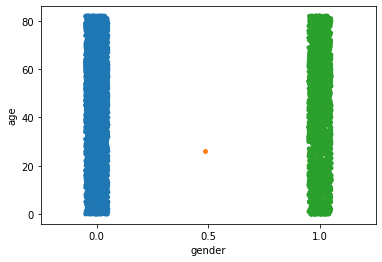

In [212]:
sns.stripplot(x="gender", y="age", data=df_ML, jitter=True)

성별당 

<AxesSubplot:xlabel='gender', ylabel='avg_glucose_level'>

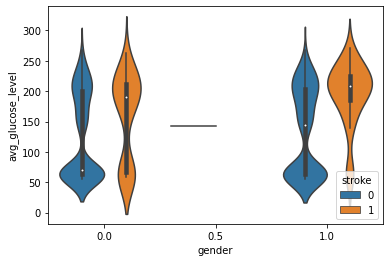

In [208]:
sns.violinplot(x="gender", y="avg_glucose_level", hue="stroke", data=df_AG[(df_AG["avg_glucose_level"] < 70) |(df_AG["avg_glucose_level"] >140 )])

<AxesSubplot:xlabel='gender', ylabel='age'>

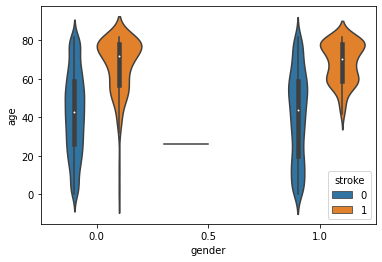

In [210]:
sns.violinplot(x="gender", y="age", hue="stroke", data=df_AG)

bmi지수가 

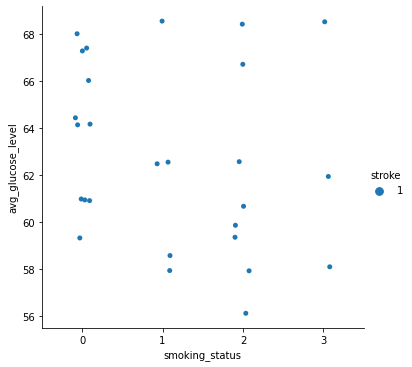

In [193]:
sns.catplot(x="smoking_status", y="avg_glucose_level", hue="stroke",data=df_age[(df_age["stroke"] == 1) & (df_age["avg_glucose_level"] < 70)])